In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import gridspec
from IPython.display import display, HTML
from math import pi
plt.style.use('fivethirtyeight')

%matplotlib inline

# ML packages
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import linear_model, tree, svm
from sklearn.tree import DecisionTreeClassifier, plot_tree
#from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

# Input files path
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import math

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

In [3]:
df15 = pd.read_csv('players_15.csv')
df16 = pd.read_csv('players_16.csv')
df17 = pd.read_csv('players_17.csv')
df18 = pd.read_csv('players_18.csv')
df19 = pd.read_csv('players_19.csv')
df20 = pd.read_csv('players_20.csv')
display(df15.head(3))
display(df16.head(3))
display(df17.head(3))
display(df18.head(3))
display(df19.head(3))
display(df20.head(3))

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,28,1987-06-24,170,72,Argentina,FC Barcelona,...,62+3,57+3,57+3,57+3,62+3,57+3,44+3,44+3,44+3,57+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,30,1985-02-05,185,80,Portugal,Real Madrid,...,64+3,60+3,60+3,60+3,64+3,60+3,52+3,52+3,52+3,60+3
2,9014,https://sofifa.com/player/9014/arjen-robben/16...,A. Robben,Arjen Robben,31,1984-01-23,180,80,Netherlands,FC Bayern München,...,65+3,60+3,60+3,60+3,65+3,59+3,47+3,47+3,47+3,59+3


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,31,1985-02-05,185,80,Portugal,Real Madrid,...,66+3,61+3,61+3,61+3,66+3,62+3,53+3,53+3,53+3,62+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,29,1987-06-24,170,72,Argentina,FC Barcelona,...,63+3,59+3,59+3,59+3,63+3,58+3,46+3,46+3,46+3,58+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Junior,24,1992-02-05,174,68,Brazil,FC Barcelona,...,64+3,59+3,59+3,59+3,64+3,59+3,46+3,46+3,46+3,59+3


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,32,1985-02-05,185,80,Portugal,Real Madrid,...,66+3,62+3,62+3,62+3,66+3,62+3,53+3,53+3,53+3,62+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,30,1987-06-24,170,72,Argentina,FC Barcelona,...,62+3,59+3,59+3,59+3,62+3,58+3,46+3,46+3,46+3,58+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Junior,25,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,64+3,59+3,59+3,59+3,64+3,60+3,47+3,47+3,47+3,60+3


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,...,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3


In [4]:
l = df15.shape,df16.shape,df17.shape,df18.shape,df19.shape,df20.shape
shape = pd.DataFrame(l)
shape.index = [2015,2016,2017,2018,2019,2020]
shape.columns = ['rows','columns']
shape

,rows,columns
2015,15465,104
2016,14881,104
2017,17009,104
2018,17592,104
2019,17770,104
2020,18278,104


In [6]:
# Checking the NULL values in FIFA 20 dataframe

temp = df15.isna().sum().reset_index()
temp.columns = ['columns','na_nbr']
temp.query('na_nbr!=0')

,columns,na_nbr
22,release_clause_eur,15465
23,player_tags,14271
24,team_position,232
25,team_jersey_number,232
26,loaned_from,14553
27,joined,1151
28,contract_valid_until,239
29,nation_position,14409
30,nation_jersey_number,14409
31,pace,1703


In [7]:
# Checking head values of each column

display(df17.head())
display(df17[['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys']].head())
df17[['potential','value_eur','wage_eur','player_positions','preferred_foot','international_reputation','weak_foot',
      'skill_moves','work_rate','body_type','release_clause_eur','team_position','team_jersey_number','pace','shooting','passing','dribbling']].head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,31,1985-02-05,185,80,Portugal,Real Madrid,...,66+3,61+3,61+3,61+3,66+3,62+3,53+3,53+3,53+3,62+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,29,1987-06-24,170,72,Argentina,FC Barcelona,...,63+3,59+3,59+3,59+3,63+3,58+3,46+3,46+3,46+3,58+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Junior,24,1992-02-05,174,68,Brazil,FC Barcelona,...,64+3,59+3,59+3,59+3,64+3,59+3,46+3,46+3,46+3,59+3
3,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,30,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,29,1987-01-24,182,85,Uruguay,FC Barcelona,...,68+4,66+4,66+4,66+4,68+4,65+4,58+4,58+4,58+4,65+4


,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys
0,84+2,93-2,87+1,82+1,88+1
1,77-3,95+2,71,88,85
2,75+3,89+1,62,81+3,83
3,15,13,25,55+7,11
4,77,94+4,77,83+1,88+1


,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,team_position,team_jersey_number,pace,shooting,passing,dribbling
0,94,87000000,340000,"LW, LM, ST",Right,5,4,5,High/Low,C. Ronaldo,NaN,LW,7.0,92.0,92.0,81.0,91.0
1,93,89000000,340000,RW,Left,5,4,4,Medium/Medium,Messi,NaN,RW,10.0,89.0,90.0,86.0,96.0
2,95,109000000,260000,LW,Right,5,5,5,High/Medium,Neymar,NaN,LW,11.0,91.0,84.0,78.0,95.0
3,92,69500000,240000,GK,Right,5,4,1,Medium/Medium,Normal,NaN,GK,1.0,NaN,NaN,NaN,NaN
4,92,83000000,255000,ST,Right,5,4,4,High/Medium,Normal,NaN,ST,9.0,82.0,90.0,79.0,87.0


In [8]:
display(df16['body_type'].value_counts())

,count
body_type,
Normal,8920
Lean,5058
Stocky,897
Messi,1
C. Ronaldo,1
Neymar,1
Courtois,1
Shaqiri,1
Akinfenwa,1


In [12]:
l_df = [df15,df16,df17,df18,df19,df20]

In [13]:
# Filling missing players attributes with '0', and then evaluating these attributes to convert them from string format to float

# Creating lists for columns names:
# Columns to drop:
c_drop = ['player_url', 'real_face', 'player_tags', 'loaned_from', 'joined', 'release_clause_eur', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'gk_diving', 'gk_handling',
          'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm',
          'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
# Different Attribute columns grouped in lists:
att_cols = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys']
skill_cols = ['skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control']
movements_cols = ['movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance']
power_cols = ['power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots']
mentality_cols = ['mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure']
defending_cols = ['defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle']
gk_cols = ['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']

attributes_cols = att_cols+skill_cols+movements_cols+power_cols+mentality_cols+defending_cols+gk_cols
l_attributes = [att_cols, skill_cols, movements_cols, power_cols, mentality_cols, defending_cols, gk_cols]

for k in l_df:
    for i in l_attributes:
        for j in i:
            k[j].fillna('0',inplace = True)


for k in l_df:
    for i in l_attributes:
        for j in i:
            temp = list(k[j])
            tempp=[]
            for item in temp:
                try:
                    item = eval(item)
                    tempp.append(item)
                except:
                    tempp.append(item)
            k[j] = tempp

<ipython-input-13-5fc86d19fbed>:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  k[j].fillna('0',inplace = True)


In [14]:
df17[attributes_cols].head()


,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,86,91,88,83,89,93,74,77,72,93,...,85,86,22,31,23,7,11,15,14,11
1,74,97,71,88,85,98,89,90,95,94,...,74,94,13,33,31,6,11,15,14,8
2,78,90,62,84,83,98,78,79,76,97,...,81,80,21,24,33,9,9,15,15,11
3,15,13,25,62,11,44,14,11,71,65,...,57,70,10,10,11,93,93,99,92,91
4,77,98,77,84,89,84,86,84,64,91,...,85,83,30,45,38,27,25,31,33,37


In [15]:
# Reduction of the number of features by averaging the features that belong to the same group in one representative feature.
# Creating new attributes columns

for item in l_df:
    item['attack_oa'] = round(item[att_cols].mean(axis=1, skipna = True))
    item['skill_oa'] = round(item[skill_cols].mean(axis=1, skipna = True))
    item['movements_oa'] = round(item[movements_cols].mean(axis=1, skipna = True))
    item['power_oa'] = round(item[power_cols].mean(axis=1, skipna = True))
    item['mentality_oa'] = round(item[mentality_cols].mean(axis=1, skipna = True))
    item['defending_oa'] = round(item[defending_cols].mean(axis=1, skipna = True))
    item['gk_oa'] = round(item[gk_cols].mean(axis=1, skipna = True))

# Dropping old attributes columns
for item in l_df:
    item.drop(c_drop, axis=1, inplace=True)
    item.drop(att_cols, axis = 1, inplace = True)
    item.drop(skill_cols, axis = 1, inplace = True)
    item.drop(movements_cols, axis = 1, inplace = True)
    item.drop(power_cols, axis = 1, inplace = True)
    item.drop(mentality_cols, axis = 1, inplace = True)
    item.drop(defending_cols, axis = 1, inplace = True)
    item.drop(gk_cols, axis = 1, inplace = True)

In [16]:
# Converting the player traits column to a numerical variable so that we can use it for later analysis and estimations.
# Assigning a value to each player trait based on its significance and importance.


l15 = ','.join(list(df15.player_traits.value_counts().index))+','
l16 = ','.join(list(df16.player_traits.value_counts().index))+','
l17 = ','.join(list(df17.player_traits.value_counts().index))+','
l18 = ','.join(list(df18.player_traits.value_counts().index))+','
l19 = ','.join(list(df19.player_traits.value_counts().index))+','
l20 = ','.join(list(df20.player_traits.value_counts().index))
l = l15+l16+l17+l18+l19+l20
ul = l.split(',')
ul = [item.replace("(CPU AI Only)","").strip() for item in ul]
traits_set = sorted(list(set(ul)), key=str.lower)
traits_value = [3,1,2,3,2,2,2,3,2,4,3,2,1,3,5,5,4,3,2,1,4,1,3,2,4,1,5,3,4,4,3,2,3,5,5,1,3,4,5,3,2,3,3,4,2]
traits_dic = {}
for i,j in zip(traits_set,traits_value):
    traits_dic[i] = j
traits_dic

{'1-on-1 Rush': 3,
 'Acrobatic Clearance': 1,
 'Argues with Officials': 2,
 'Avoids Using Weaker Foot': 3,
 'Backs Into Player': 2,
 'Beat Offside Trap': 2,
 'Cautious With Crosses': 2,
 'Chip Shot': 3,
 'Comes For Crosses': 2,
 'Crowd Favourite': 4,
 'Diver': 3,
 'Dives Into Tackles': 2,
 'Early Crosser': 1,
 'Finesse Shot': 3,
 'Flair': 5,
 'Flair Passes': 5,
 'Giant Throw-in': 4,
 'GK Long Throw': 3,
 'GK Up for Corners': 2,
 'Inflexible': 1,
 'Injury Free': 4,
 'Injury Prone': 1,
 'Leadership': 3,
 'Long Passer': 2,
 'Long Shot Taker': 4,
 'Long Throw-in': 1,
 'One Club Player': 5,
 'Outside Foot Shot': 3,
 'Playmaker': 4,
 'Power Free-Kick': 4,
 'Power Header': 3,
 'Puncher': 2,
 'Rushes Out Of Goal': 3,
 'Saves with Feet': 5,
 'Second Wind': 5,
 'Selfish': 1,
 'Set Play Specialist': 3,
 'Skilled Dribbling': 4,
 'Speed Dribbler': 5,
 'Swerve Pass': 3,
 'Takes Finesse Free Kicks': 2,
 'Target Forward': 3,
 'Team Player': 3,
 'Technical Dribbler': 4,
 'Through Ball': 2}

In [17]:
# Creating a new column for the trait coefficient

def calcul_trait_coef(s):
    coef=0
    try:
        s.strip()
        l = s.split(',')
        for i in l:
            coef = coef + traits_dic[i.replace("(CPU AI Only)","").strip()]
    except:
        return 0
    return coef

def create_traits_colum(df):
    col = []
    l = list(df.player_traits)
    for i in l:
        coef = calcul_trait_coef(i)
        col.append(coef)
    return col

In [18]:
df15['trait_coef'] = create_traits_colum(df15)
df16['trait_coef'] = create_traits_colum(df16)
df17['trait_coef'] = create_traits_colum(df17)
df18['trait_coef'] = create_traits_colum(df18)
df19['trait_coef'] = create_traits_colum(df19)
df20['trait_coef'] = create_traits_colum(df20)

# Dropping player traits column

for item in l_df:
    item.drop(['player_traits'], axis=1, inplace=True)

In [19]:
# Changing the NULL, RES, and SUB team positions values to the actual player position

for item in l_df:
    l_res = []
    l_sub = []
    l_null = []
    res_idx = list(item.query('team_position == "RES"').index)
    sub_idx = list(item.query('team_position == "SUB"').index)
    null_idx = list(item.team_position.isnull().index)
    for i in res_idx:
        temp = item.loc[i,'player_positions'].split(',')
        l_res.append(temp[0])
    for j in sub_idx:
        temp = item.loc[j,'player_positions'].split(',')
        l_sub.append(temp[0])
    for k in null_idx:
        temp = item.loc[k,'player_positions'].split(',')
        l_null.append(temp[0])
    item.loc[res_idx,'team_position'] = l_res
    item.loc[sub_idx,'team_position'] = l_sub
    item.loc[null_idx,'team_position'] = l_null

In [20]:
for item in l_df:
    item.drop('player_positions', axis=1, inplace=True)

In [21]:
df20.team_position.value_counts()

,count
team_position,
CB,3162
ST,2582
CM,2193
GK,2036
CDM,1424
RB,1314
LB,1303
CAM,1146
RM,1050


In [22]:
# Checking for remaining NULL values

temp = df17.isna().sum().reset_index()
temp.columns = ['columns','na_nbr']
temp.query('na_nbr!=0')

,columns,na_nbr
20,team_jersey_number,224
21,pace,1925
22,shooting,1925
23,passing,1925
24,dribbling,1925
25,defending,1925
26,physic,1925


In [23]:

for item in l_df[1:]:
    temp = item.body_type.value_counts()
    l = list(temp[3:].index)
    for i in l:
        idx = list(item[item['body_type']==i].index)
        item.loc[idx,'body_type']='Normal'
df20.body_type.value_counts()

,count
body_type,
Normal,10757
Lean,6505
Stocky,1016


In [24]:
# Changing GK NULL attributes to 0, and changing players NULL team jersey number to 0

for item in l_df:
    gk_idx = list(item.pace.isnull())
    item.loc[gk_idx,['pace','shooting','passing','dribbling','defending','physic']] = 0
    no_team_idx = list(item.team_jersey_number.isnull())
    item.loc[no_team_idx,'team_jersey_number'] = 0

In [25]:
# Checking the final form of a dataframe

display(df17.head())
df17[['potential','value_eur','wage_eur','preferred_foot','international_reputation','weak_foot',
      'skill_moves','work_rate','body_type','team_position','team_jersey_number','pace','shooting','passing','dribbling']].head()

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,defending,physic,attack_oa,skill_oa,movements_oa,power_oa,mentality_oa,defending_oa,gk_oa,trait_coef
0,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,31,1985-02-05,185,80,Portugal,Real Madrid,94,...,33.0,80.0,87.0,82.0,87.0,91.0,75.0,25.0,12.0,18
1,158023,L. Messi,Lionel Andrés Messi Cuccittini,29,1987-06-24,170,72,Argentina,FC Barcelona,93,...,26.0,61.0,83.0,93.0,91.0,75.0,71.0,26.0,11.0,20
2,190871,Neymar,Neymar da Silva Santos Junior,24,1992-02-05,174,68,Brazil,FC Barcelona,92,...,30.0,56.0,79.0,86.0,91.0,67.0,71.0,26.0,12.0,12
3,167495,M. Neuer,Manuel Neuer,30,1986-03-27,193,92,Germany,FC Bayern München,92,...,0.0,0.0,25.0,41.0,60.0,49.0,45.0,10.0,94.0,11
4,176580,L. Suárez,Luis Alberto Suárez Díaz,29,1987-01-24,182,85,Uruguay,FC Barcelona,92,...,42.0,79.0,85.0,82.0,81.0,82.0,77.0,38.0,31.0,9


,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,team_position,team_jersey_number,pace,shooting,passing,dribbling
0,94,87000000,340000,Right,5,4,5,High/Low,Normal,LW,7.0,92.0,92.0,81.0,91.0
1,93,89000000,340000,Left,5,4,4,Medium/Medium,Normal,RW,10.0,89.0,90.0,86.0,96.0
2,95,109000000,260000,Right,5,5,5,High/Medium,Normal,LW,11.0,91.0,84.0,78.0,95.0
3,92,69500000,240000,Right,5,4,1,Medium/Medium,Normal,GK,1.0,0.0,0.0,0.0,0.0
4,92,83000000,255000,Right,5,4,4,High/Medium,Normal,ST,9.0,82.0,90.0,79.0,87.0


In [26]:
# Building and saving the master dataframe

years=['2015','2016','2017','2018','2019','2020']
k=0
for item in l_df:
    item['year'] = years[k]
    k=k+1

df = pd.concat(l_df)
df.to_csv('fifa_data_2015_to_2020.csv', index=False)

In [27]:
df = pd.read_csv('./fifa_data_2015_to_2020.csv')
df.head(7)

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,physic,attack_oa,skill_oa,movements_oa,power_oa,mentality_oa,defending_oa,gk_oa,trait_coef,year
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,93,...,63.0,83.0,90.0,94.0,75.0,54.0,22.0,11.0,16,2015
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,92,...,79.0,88.0,85.0,84.0,90.0,58.0,25.0,12.0,18,2015
2,9014,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,90,...,64.0,79.0,86.0,93.0,78.0,59.0,28.0,10.0,20,2015
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,90,...,86.0,84.0,84.0,73.0,85.0,60.0,28.0,12.0,20,2015
4,167495,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,90,...,0.0,28.0,29.0,62.0,57.0,25.0,25.0,90.0,8,2015
5,176580,L. Suárez,Luis Alberto Suárez Díaz,27,1987-01-24,181,81,Uruguay,FC Barcelona,89,...,79.0,82.0,82.0,76.0,79.0,63.0,38.0,31.0,15,2015
6,183277,E. Hazard,Eden Hazard,23,1991-01-07,173,74,Belgium,Chelsea,88,...,64.0,76.0,85.0,90.0,72.0,59.0,25.0,9.0,21,2015


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100995 entries, 0 to 100994
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   sofifa_id                 100995 non-null  int64  
 1   short_name                100995 non-null  object 
 2   long_name                 100995 non-null  object 
 3   age                       100995 non-null  int64  
 4   dob                       100995 non-null  object 
 5   height_cm                 100995 non-null  int64  
 6   weight_kg                 100995 non-null  int64  
 7   nationality               100995 non-null  object 
 8   club                      100995 non-null  object 
 9   overall                   100995 non-null  int64  
 10  potential                 100995 non-null  int64  
 11  value_eur                 100995 non-null  int64  
 12  wage_eur                  100995 non-null  int64  
 13  preferred_foot            100995 non-null  o

In [29]:
def get_year(df,year):
    temp = df.query('year==@year').reset_index()
    return temp

In [30]:
df15 = get_year(df,2015)
df16 = get_year(df,2016)
df17 = get_year(df,2017)
df18 = get_year(df,2018)
df19 = get_year(df,2019)
df20 = get_year(df,2020)
l_df=[df15,df16,df17,df18,df19,df20]

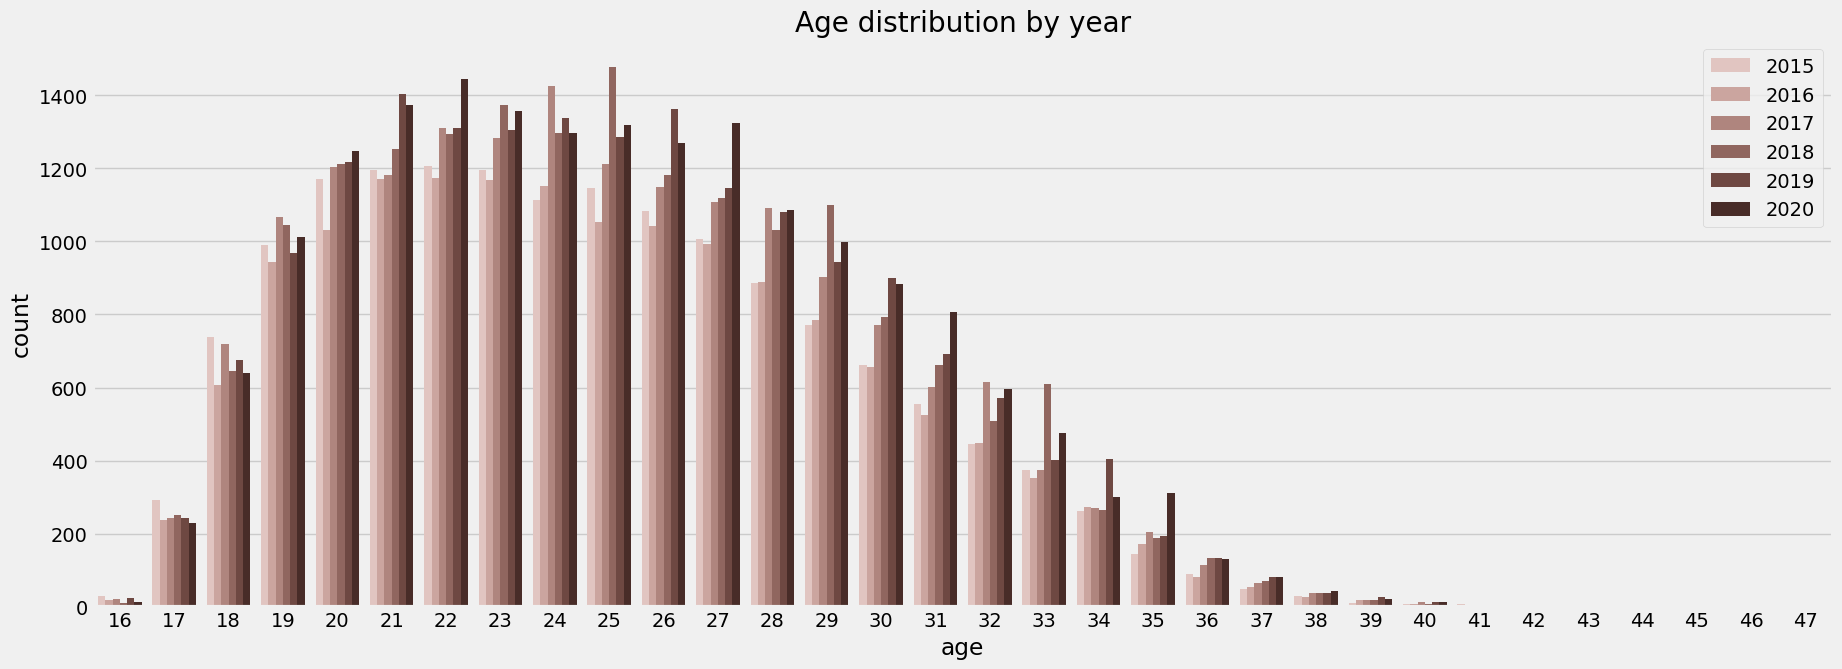

In [31]:
plt.figure(figsize = (20,7))
sb.countplot(data = df, x = 'age', hue='year', palette = sb.cubehelix_palette(6, start=1, rot=0, dark=0.2, light=.8, reverse=False))
plt.title('Age distribution by year')
plt.legend(loc=1);

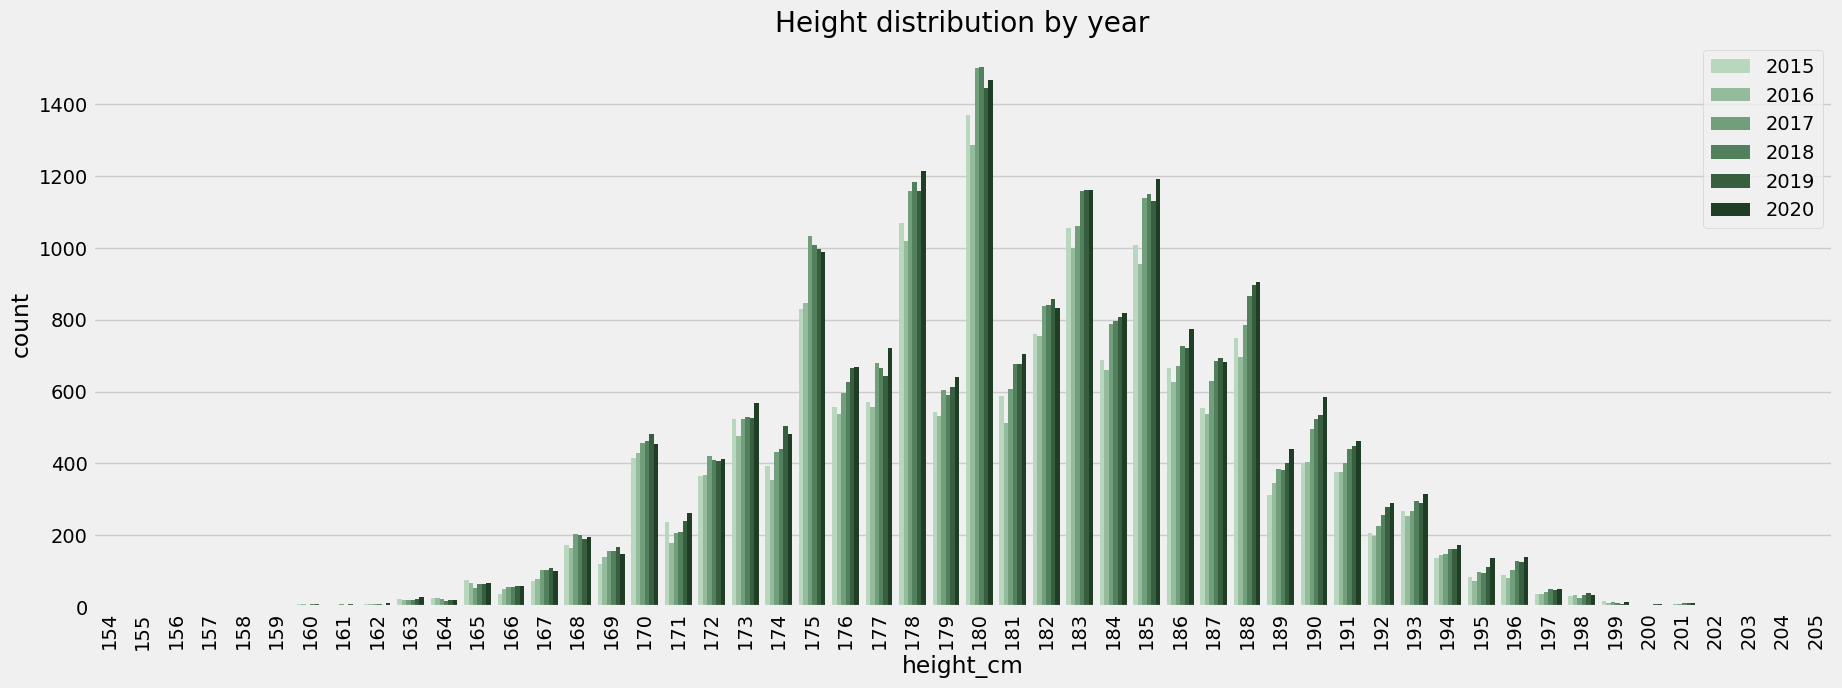

In [33]:
plt.figure(figsize = (20,7))
sb.countplot(data = df, x = 'height_cm', hue='year', palette = sb.cubehelix_palette(6, start=2, rot=0, dark=0.2, light=.8, reverse=False))
plt.title('Height distribution by year')
plt.xticks(rotation=90)
plt.legend(loc=1);

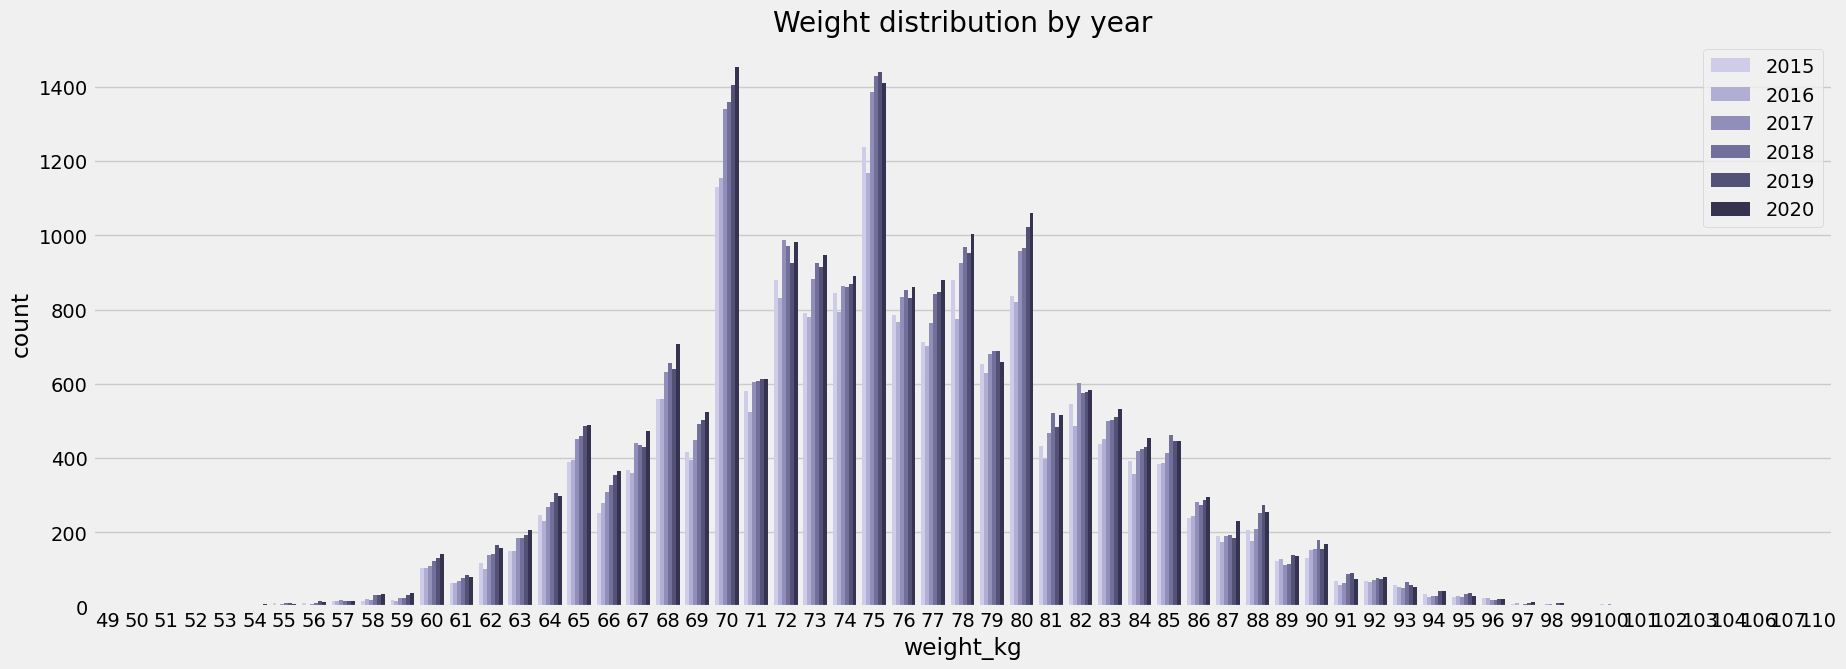

In [34]:
plt.figure(figsize = (20,7))
sb.countplot(data = df, x = 'weight_kg', hue='year', palette = sb.cubehelix_palette(6, start=3, rot=0, dark=0.2, light=.8, reverse=False))
plt.title('Weight distribution by year')
plt.legend(loc=1);

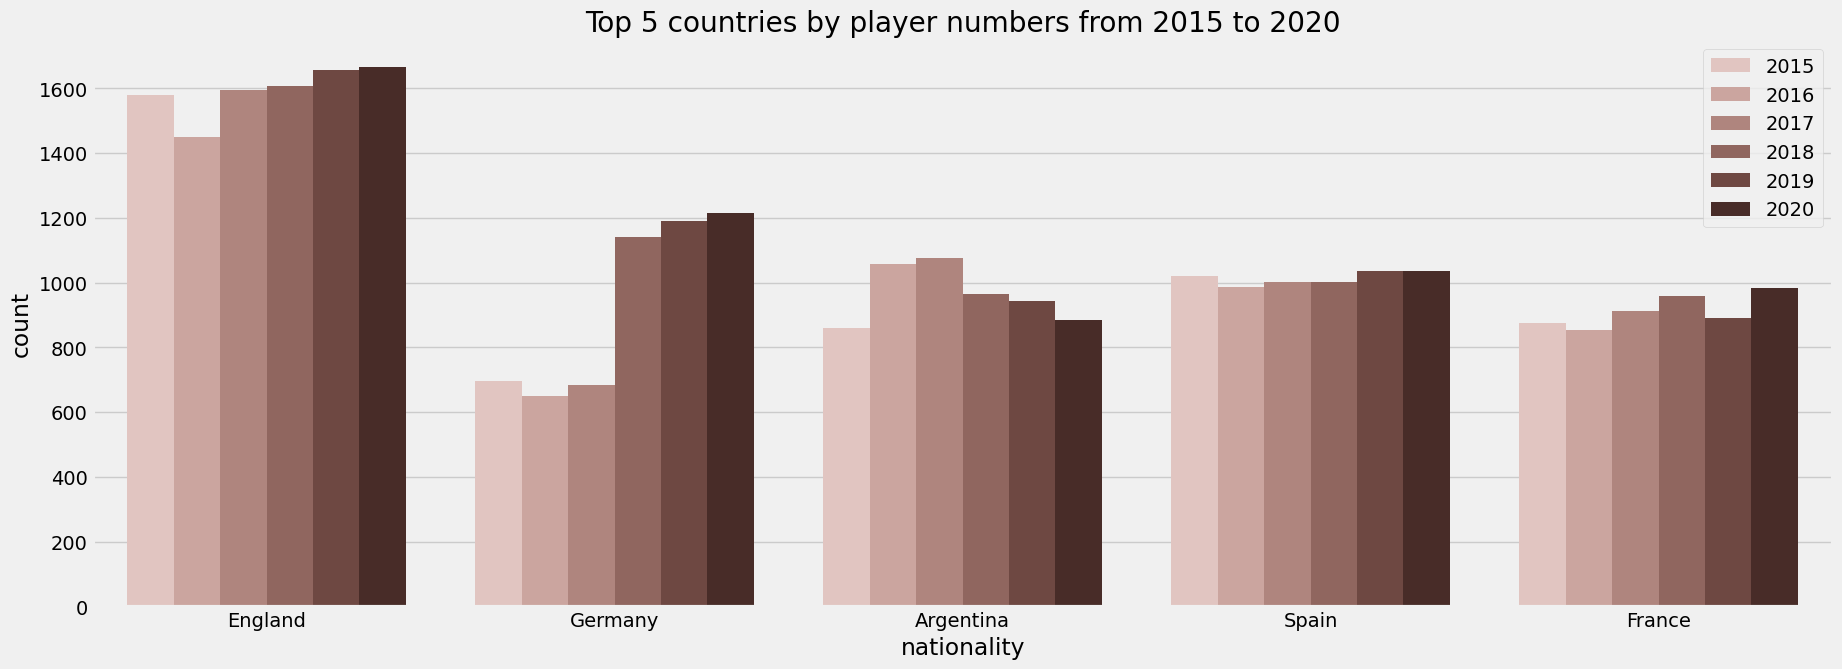

In [35]:
plt.figure(figsize = (20,7))
temp_df = df.groupby(['year','nationality']).count()['sofifa_id'].sort_values(ascending=False).iloc[:50].reset_index()
nl = ['England', 'Germany', 'Argentina', 'Spain', 'France']
top5 = temp_df.query('nationality in @nl')
sb.barplot(data = top5, x = 'nationality', y='sofifa_id' , hue='year', palette = sb.cubehelix_palette(6, start=4, rot=0, dark=0.2, light=.8, reverse=False))
plt.title('Top 5 countries by player numbers from 2015 to 2020')
plt.legend(loc=1)
plt.ylabel('count');

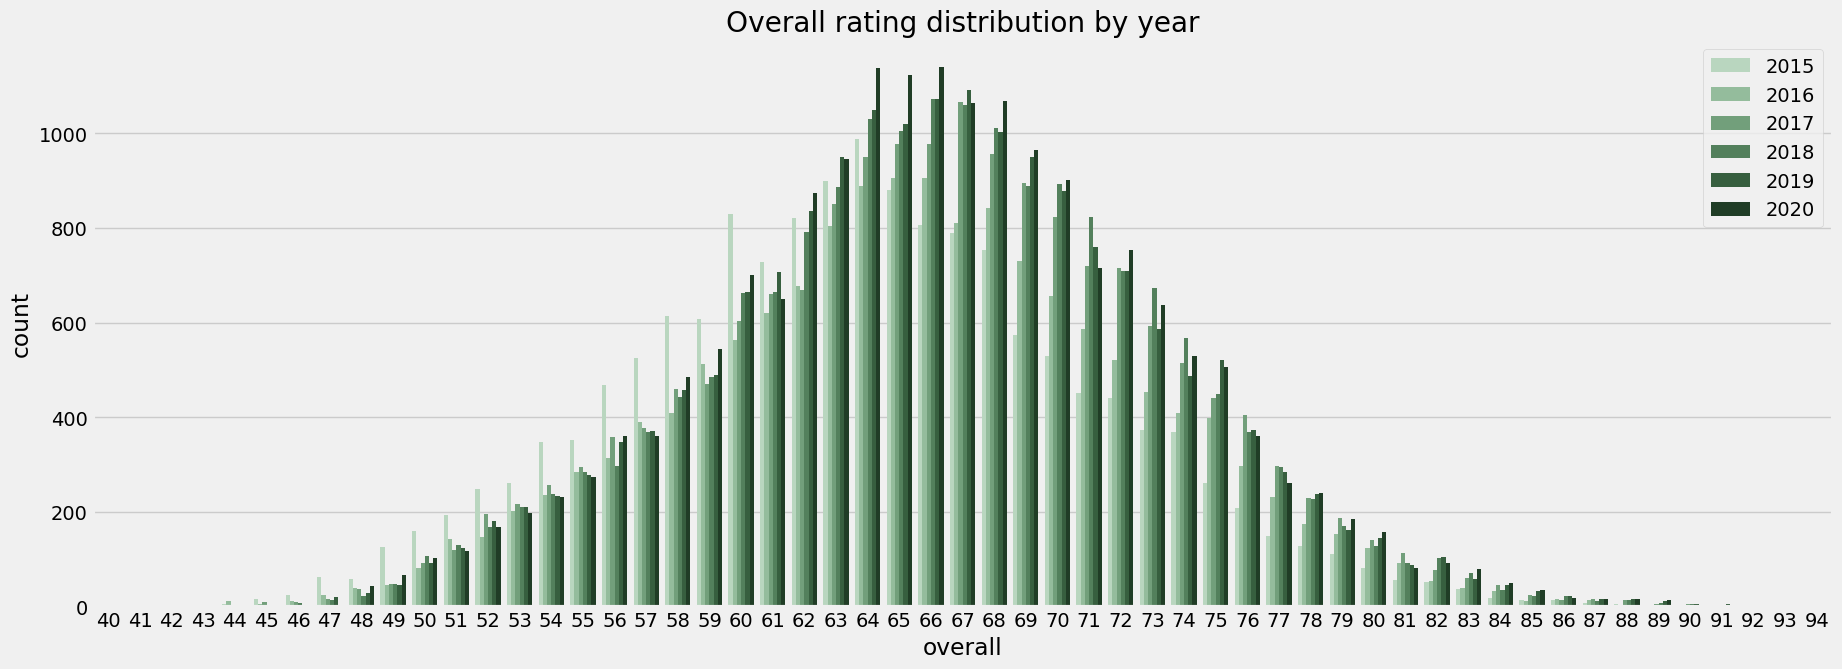

In [36]:
plt.figure(figsize = (20,7))
sb.countplot(data = df, x = 'overall', hue='year', palette = sb.cubehelix_palette(6, start=5, rot=0, dark=0.2, light=.8, reverse=False))
plt.title('Overall rating distribution by year')
plt.legend(loc=1);

<ipython-input-37-9627df2b64b4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=l[0], x='short_name', y='overall', palette='Reds_r')
<ipython-input-37-9627df2b64b4>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=l[1], x='short_name', y='overall', palette='Reds_r')
<ipython-input-37-9627df2b64b4>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=l[2], x='short_name', y='overall', palette='Reds_r')
<ipython-input-37-9627df2b64b4>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in

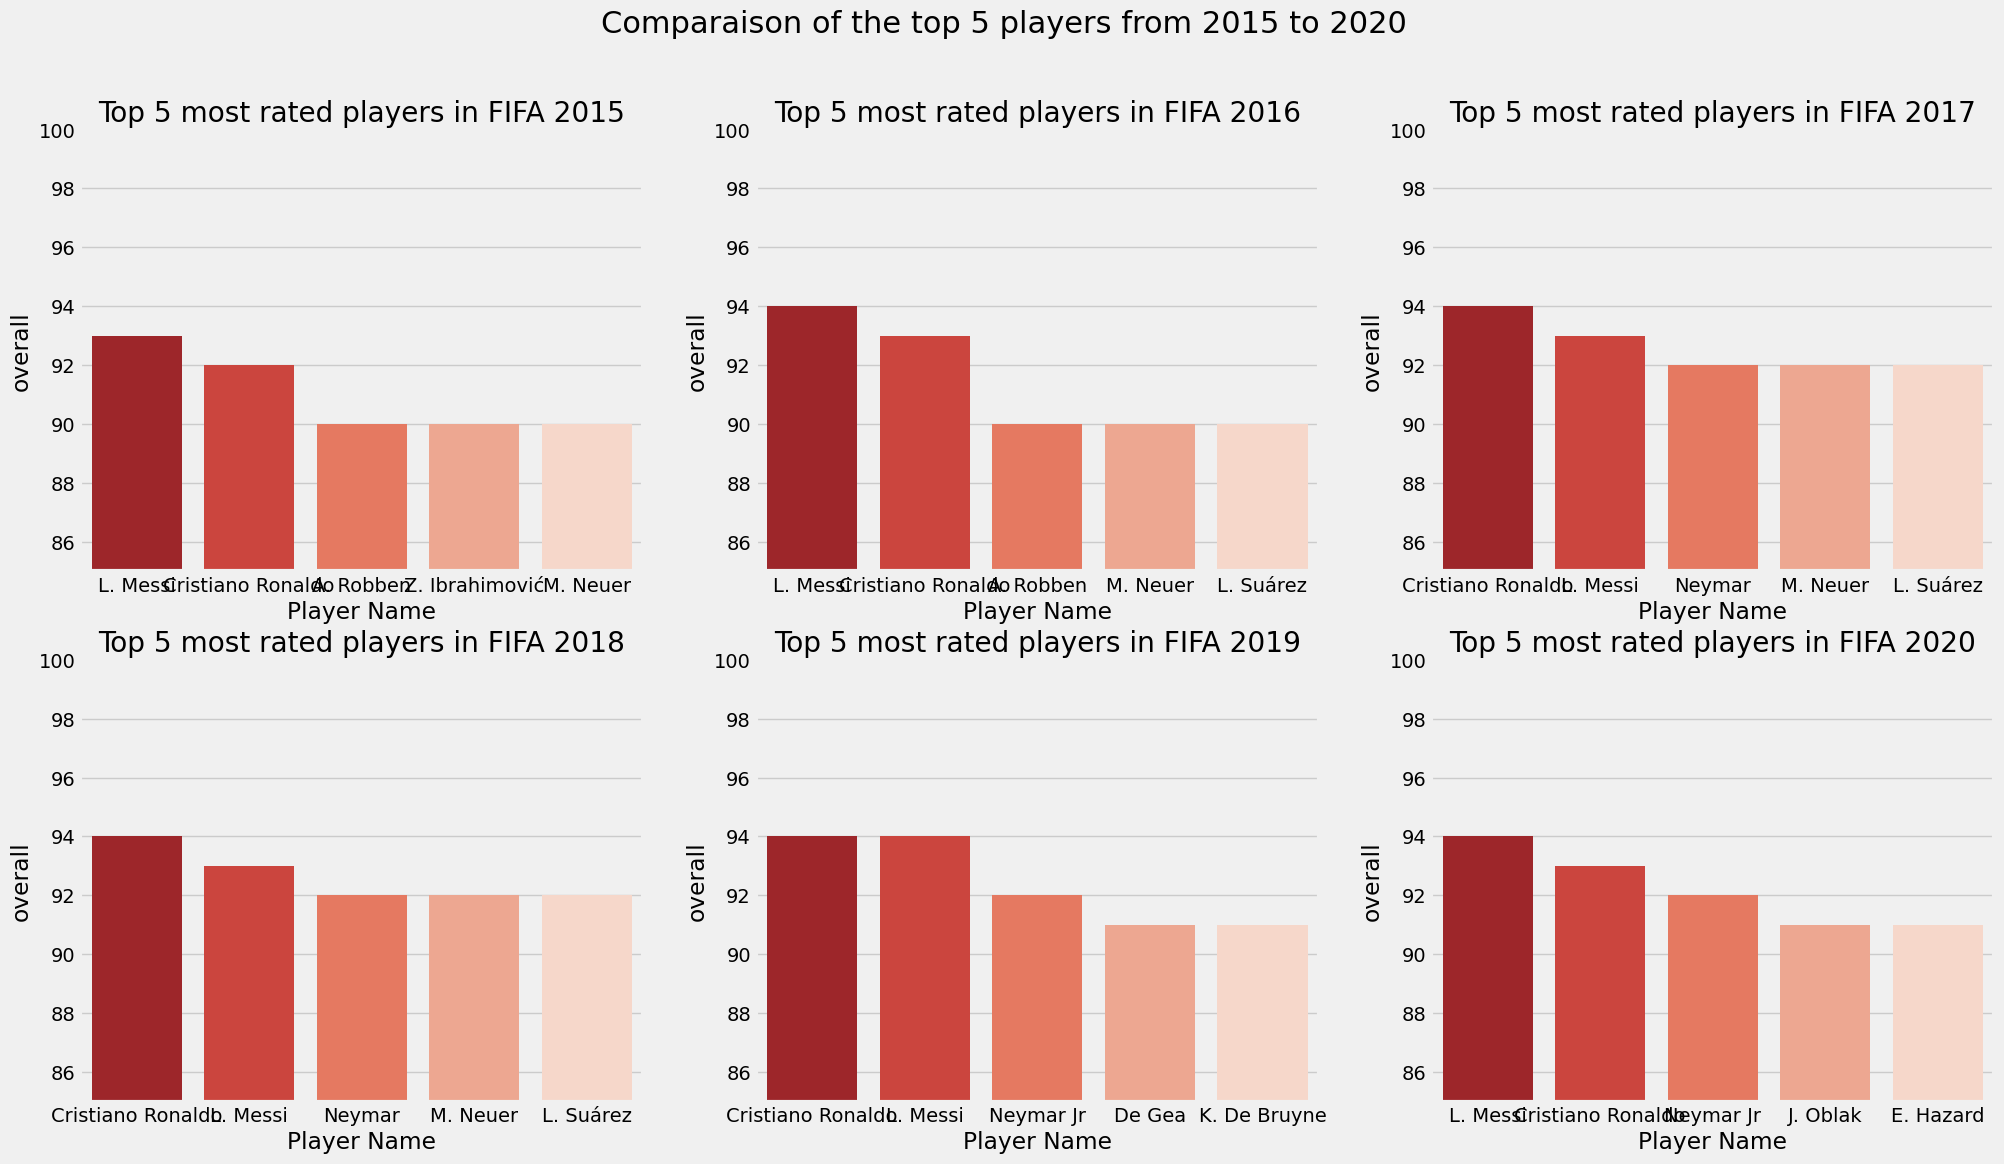

In [37]:
l=[]
for i in l_df:
    temp = i.head(5)[['short_name','overall','year']]
    l.append(temp)
fig = plt.figure(figsize=(22,12))
plt.suptitle('Comparaison of the top 5 players from 2015 to 2020',fontsize=22)
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)
plt.subplot(231)
sb.barplot(data=l[0], x='short_name', y='overall', palette='Reds_r')
plt.ylim(85, 100)
plt.xlabel('Player Name')
plt.title('Top 5 most rated players in FIFA 2015')
plt.subplot(232)
sb.barplot(data=l[1], x='short_name', y='overall', palette='Reds_r')
plt.ylim(85, 100)
plt.xlabel('Player Name')
plt.title('Top 5 most rated players in FIFA 2016')
plt.subplot(233)
sb.barplot(data=l[2], x='short_name', y='overall', palette='Reds_r')
plt.ylim(85, 100)
plt.xlabel('Player Name')
plt.title('Top 5 most rated players in FIFA 2017')
plt.subplot(234)
sb.barplot(data=l[3], x='short_name', y='overall', palette='Reds_r')
plt.ylim(85, 100)
plt.xlabel('Player Name')
plt.title('Top 5 most rated players in FIFA 2018')
plt.subplot(235)
sb.barplot(data=l[4], x='short_name', y='overall', palette='Reds_r')
plt.ylim(85, 100)
plt.xlabel('Player Name')
plt.title('Top 5 most rated players in FIFA 2019')
plt.subplot(236)
sb.barplot(data=l[5], x='short_name', y='overall', palette='Reds_r')
plt.ylim(85, 100)
plt.xlabel('Player Name')
plt.title('Top 5 most rated players in FIFA 2020');

<ipython-input-38-169f0c3f6566>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=avg_ovr, x='year', y='overall', palette= sb.cubehelix_palette(6, start=3, rot=0, dark=0.2, light=.8, reverse=False))
<ipython-input-38-169f0c3f6566>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=avg_value, x='year', y='value_eur', palette= sb.cubehelix_palette(6, start=3.5, rot=0, dark=0.2, light=.8, reverse=False))
<ipython-input-38-169f0c3f6566>:12: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sb.barplot(data=avg_value, x='year', y='value_eur', palette= sb.cubehelix_palette(6, start=3.5, rot=0, dark=0.2, light=.8, reverse=False))


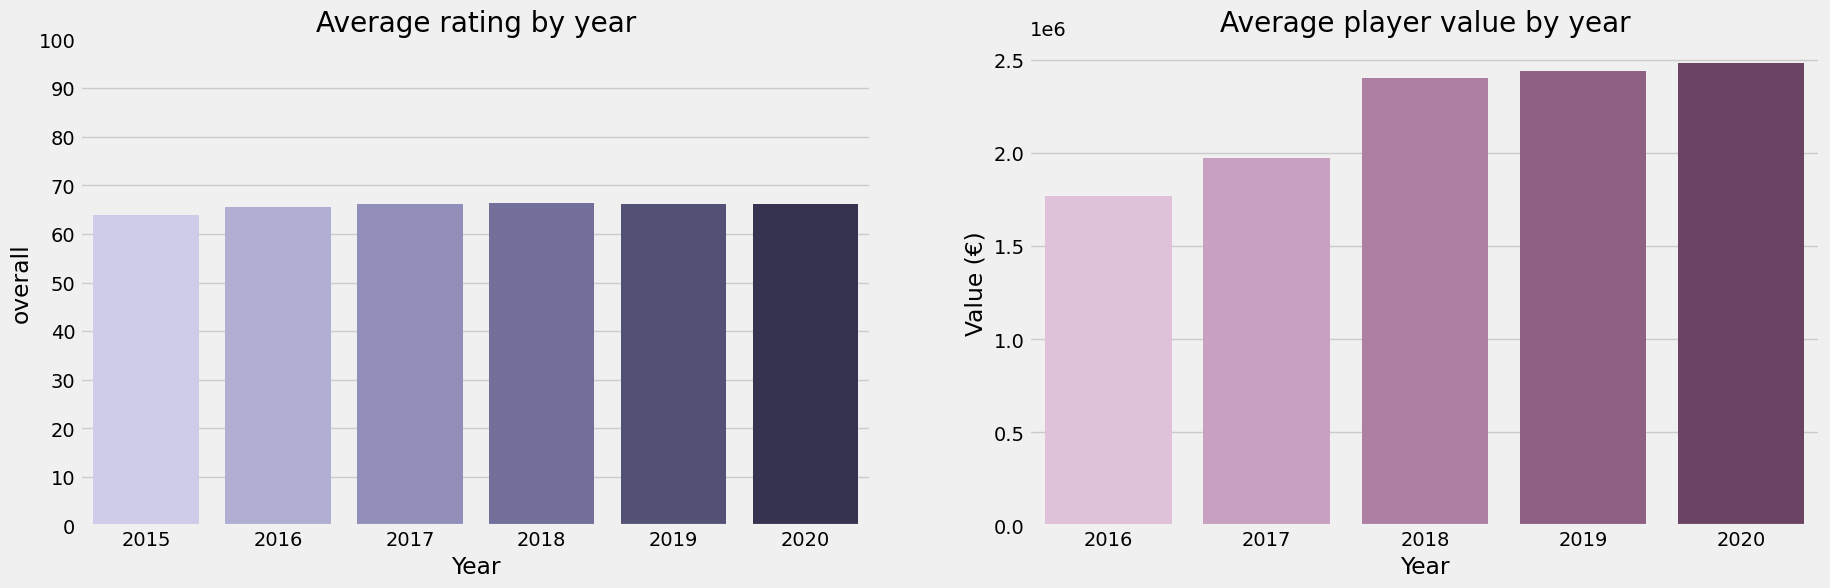

In [38]:
avg_ovr = df.groupby('year')['overall'].mean().reset_index()
avg_value = df.groupby('year')['value_eur'].mean().reset_index().drop(0,axis=0)

plt.figure(figsize=(20,6))
plt.subplot(121)
sb.barplot(data=avg_ovr, x='year', y='overall', palette= sb.cubehelix_palette(6, start=3, rot=0, dark=0.2, light=.8, reverse=False))
plt.ylim(0, 100)
plt.xlabel('Year')
plt.title('Average rating by year')
plt.yticks(np.arange(0, 100+1, 10))
plt.subplot(122)
sb.barplot(data=avg_value, x='year', y='value_eur', palette= sb.cubehelix_palette(6, start=3.5, rot=0, dark=0.2, light=.8, reverse=False))
plt.xlabel('Year')
plt.ylabel('Value (€)')
plt.title('Average player value by year');

In [39]:
# Calculating the proportion of right foot players and left foot players in our dataset.

pref_foot = df.groupby(['year','preferred_foot'])['preferred_foot'].count().rename('count', inplace=True).reset_index()
pref_foot = pref_foot.pivot(index='year', columns='preferred_foot', values='count')
s = pref_foot['Left']+pref_foot['Right']
pref_foot['Left'] = pref_foot['Left']/s
pref_foot['Right'] = pref_foot['Right']/s

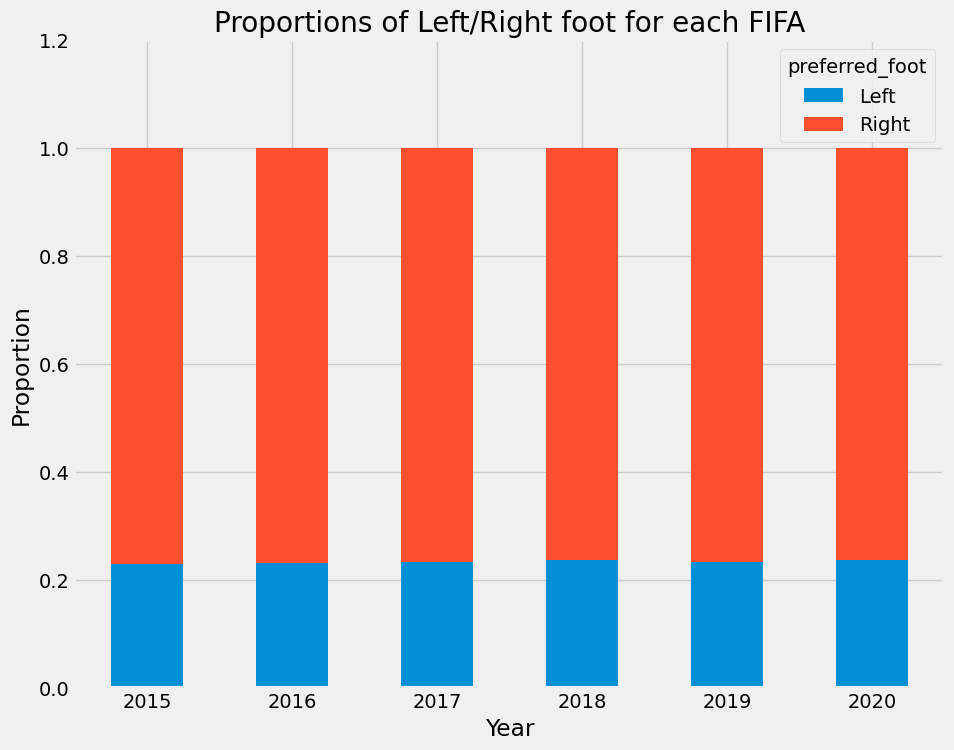

In [40]:
pref_foot.plot(kind='bar', stacked=True, figsize=(10,8), rot=0)
plt.title('Proportions of Left/Right foot for each FIFA')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.ylim(0,1.2);

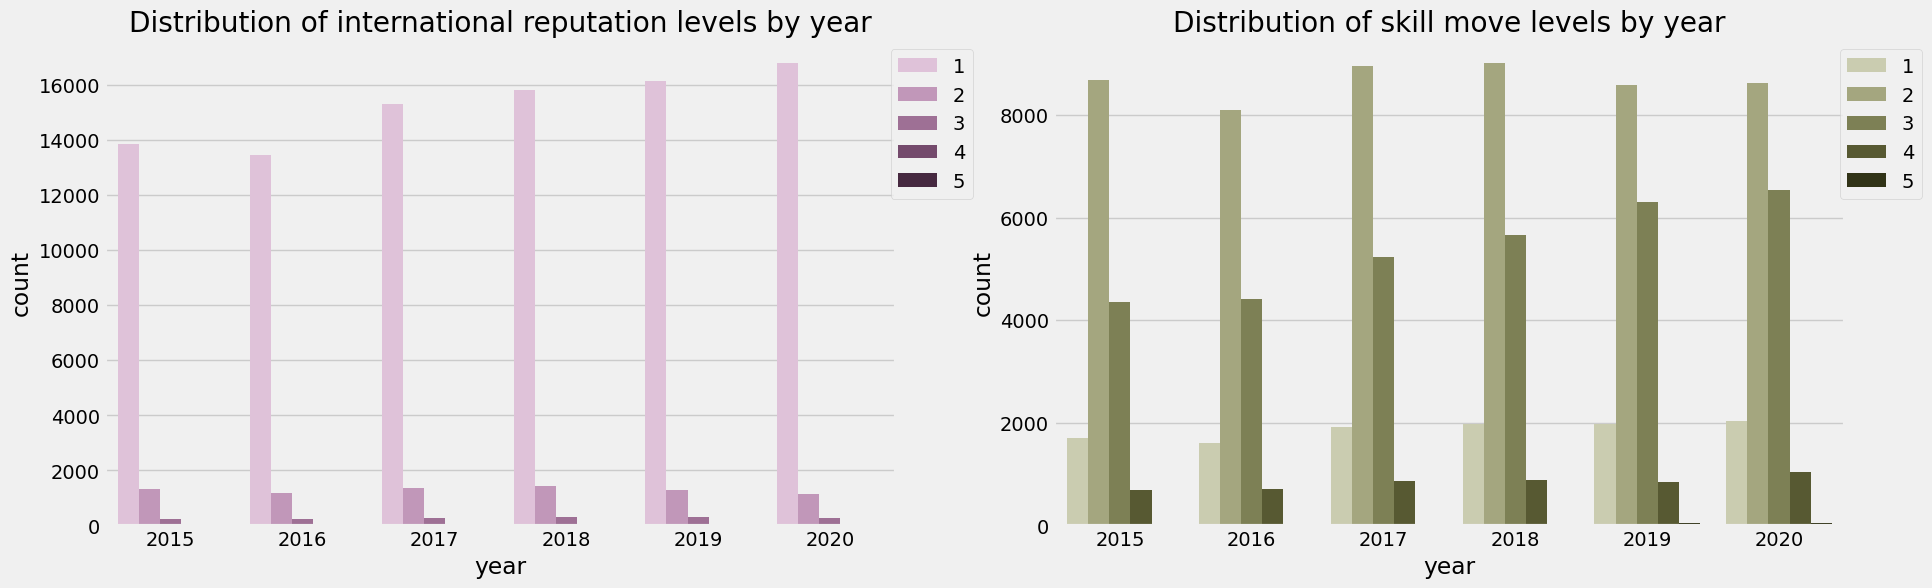

In [41]:
plt.figure(figsize=(20,6))
plt.tight_layout()
plt.subplot(121)
sb.countplot(data=df, x='year', hue='international_reputation', palette= sb.cubehelix_palette(5, start=3.5, rot=0, dark=0.2, light=.8, reverse=False))
plt.legend(loc='upper right', bbox_to_anchor=(1.11, 1))
plt.title('Distribution of international reputation levels by year')
plt.subplot(122)
sb.countplot(data=df, x='year', hue='skill_moves', palette= sb.cubehelix_palette(5, start=1.5, rot=0, dark=0.2, light=.8, reverse=False))
plt.legend(loc='upper right', bbox_to_anchor=(1.11, 1))
plt.title('Distribution of skill move levels by year');

<ipython-input-42-e433fb8661ff>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df16.value_eur, kde=False, bins=100)
<ipython-input-42-e433fb8661ff>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df17.value_eur, kde=False, bins=100)
<ipython-input-42-e433fb8661ff>:16: UserWarning: 

`distplot`

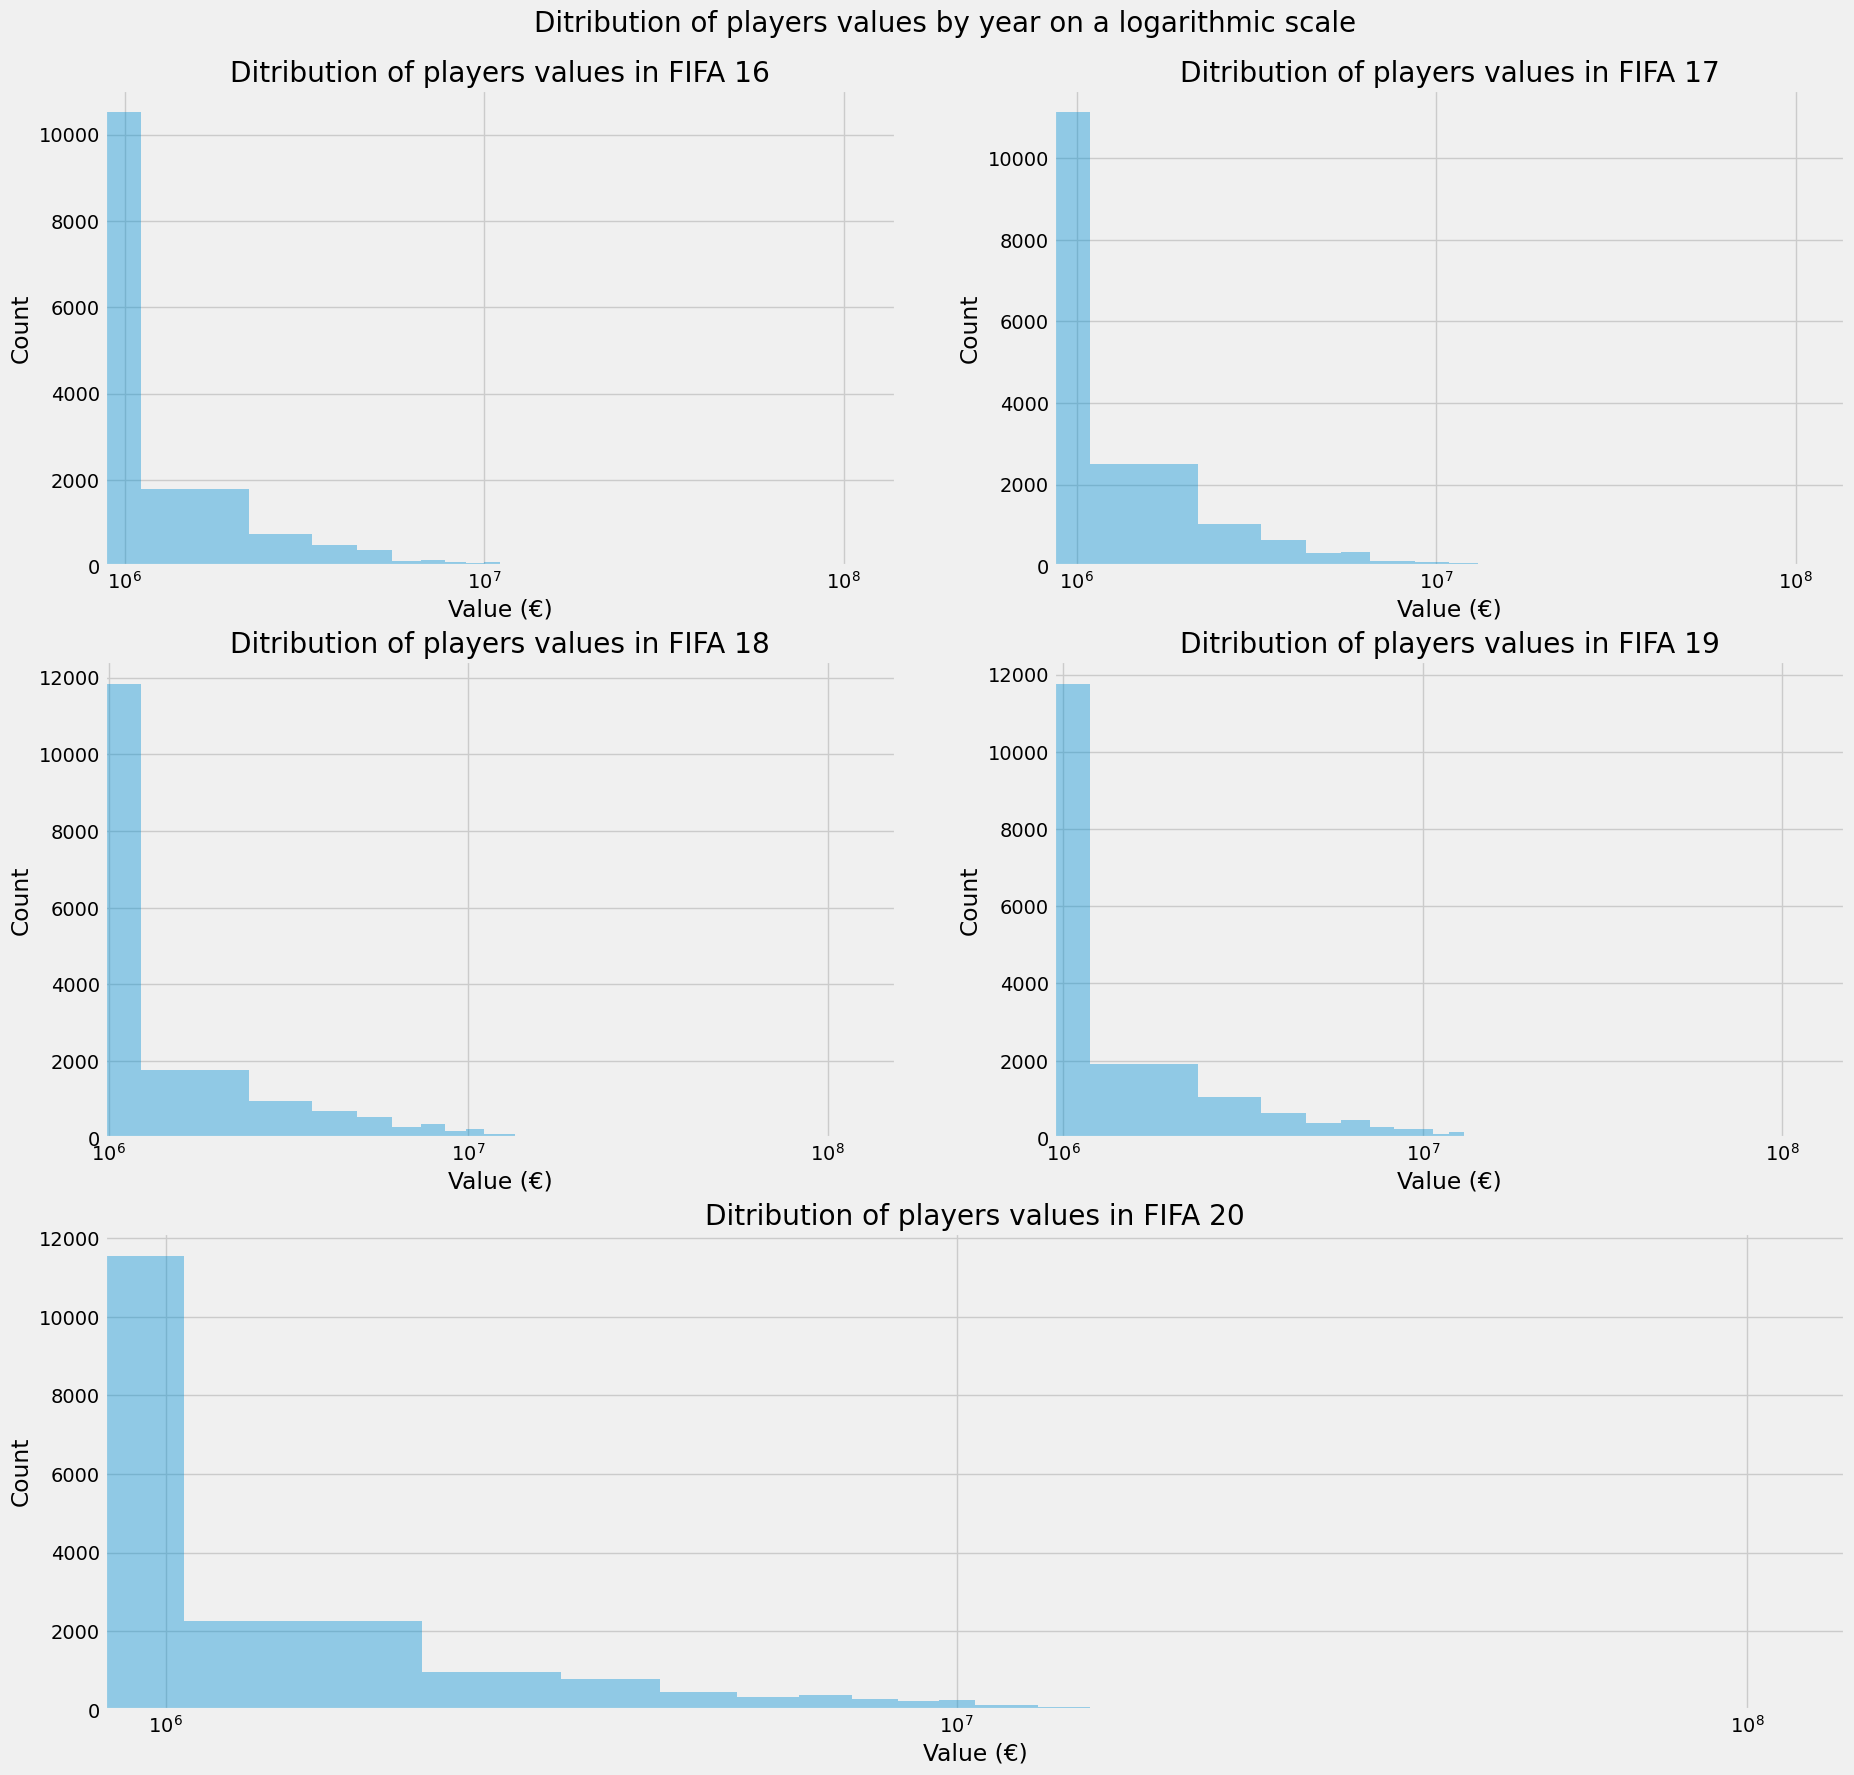

In [42]:
plt.figure(figsize=(20,20))
plt.suptitle('Ditribution of players values by year on a logarithmic scale', y=0.92, fontsize=20)
plt.subplot(321)
sb.distplot(df16.value_eur, kde=False, bins=100)
plt.title('Ditribution of players values in FIFA 16')
plt.xscale('log')
plt.xlabel('Value (€)')
plt.ylabel('Count')
plt.subplot(322)
sb.distplot(df17.value_eur, kde=False, bins=100)
plt.title('Ditribution of players values in FIFA 17')
plt.xscale('log')
plt.xlabel('Value (€)')
plt.ylabel('Count')
plt.subplot(323)
sb.distplot(df18.value_eur, kde=False, bins=100)
plt.title('Ditribution of players values in FIFA 18')
plt.xscale('log')
plt.xlabel('Value (€)')
plt.ylabel('Count')
plt.subplot(324)
sb.distplot(df19.value_eur, kde=False, bins=100)
plt.title('Ditribution of players values in FIFA 19')
plt.xscale('log')
plt.xlabel('Value (€)')
plt.ylabel('Count')
plt.subplot(313)
sb.distplot(df20.value_eur, kde=False, bins=100)
plt.title('Ditribution of players values in FIFA 20')
plt.xscale('log')
plt.xlabel('Value (€)')
plt.ylabel('Count');

In [43]:
def get_players_noGK(df):
    idx_df_gk = list(df.query('pace==0').index)
    df_noGK = df.drop(idx_df_gk)
    return df_noGK

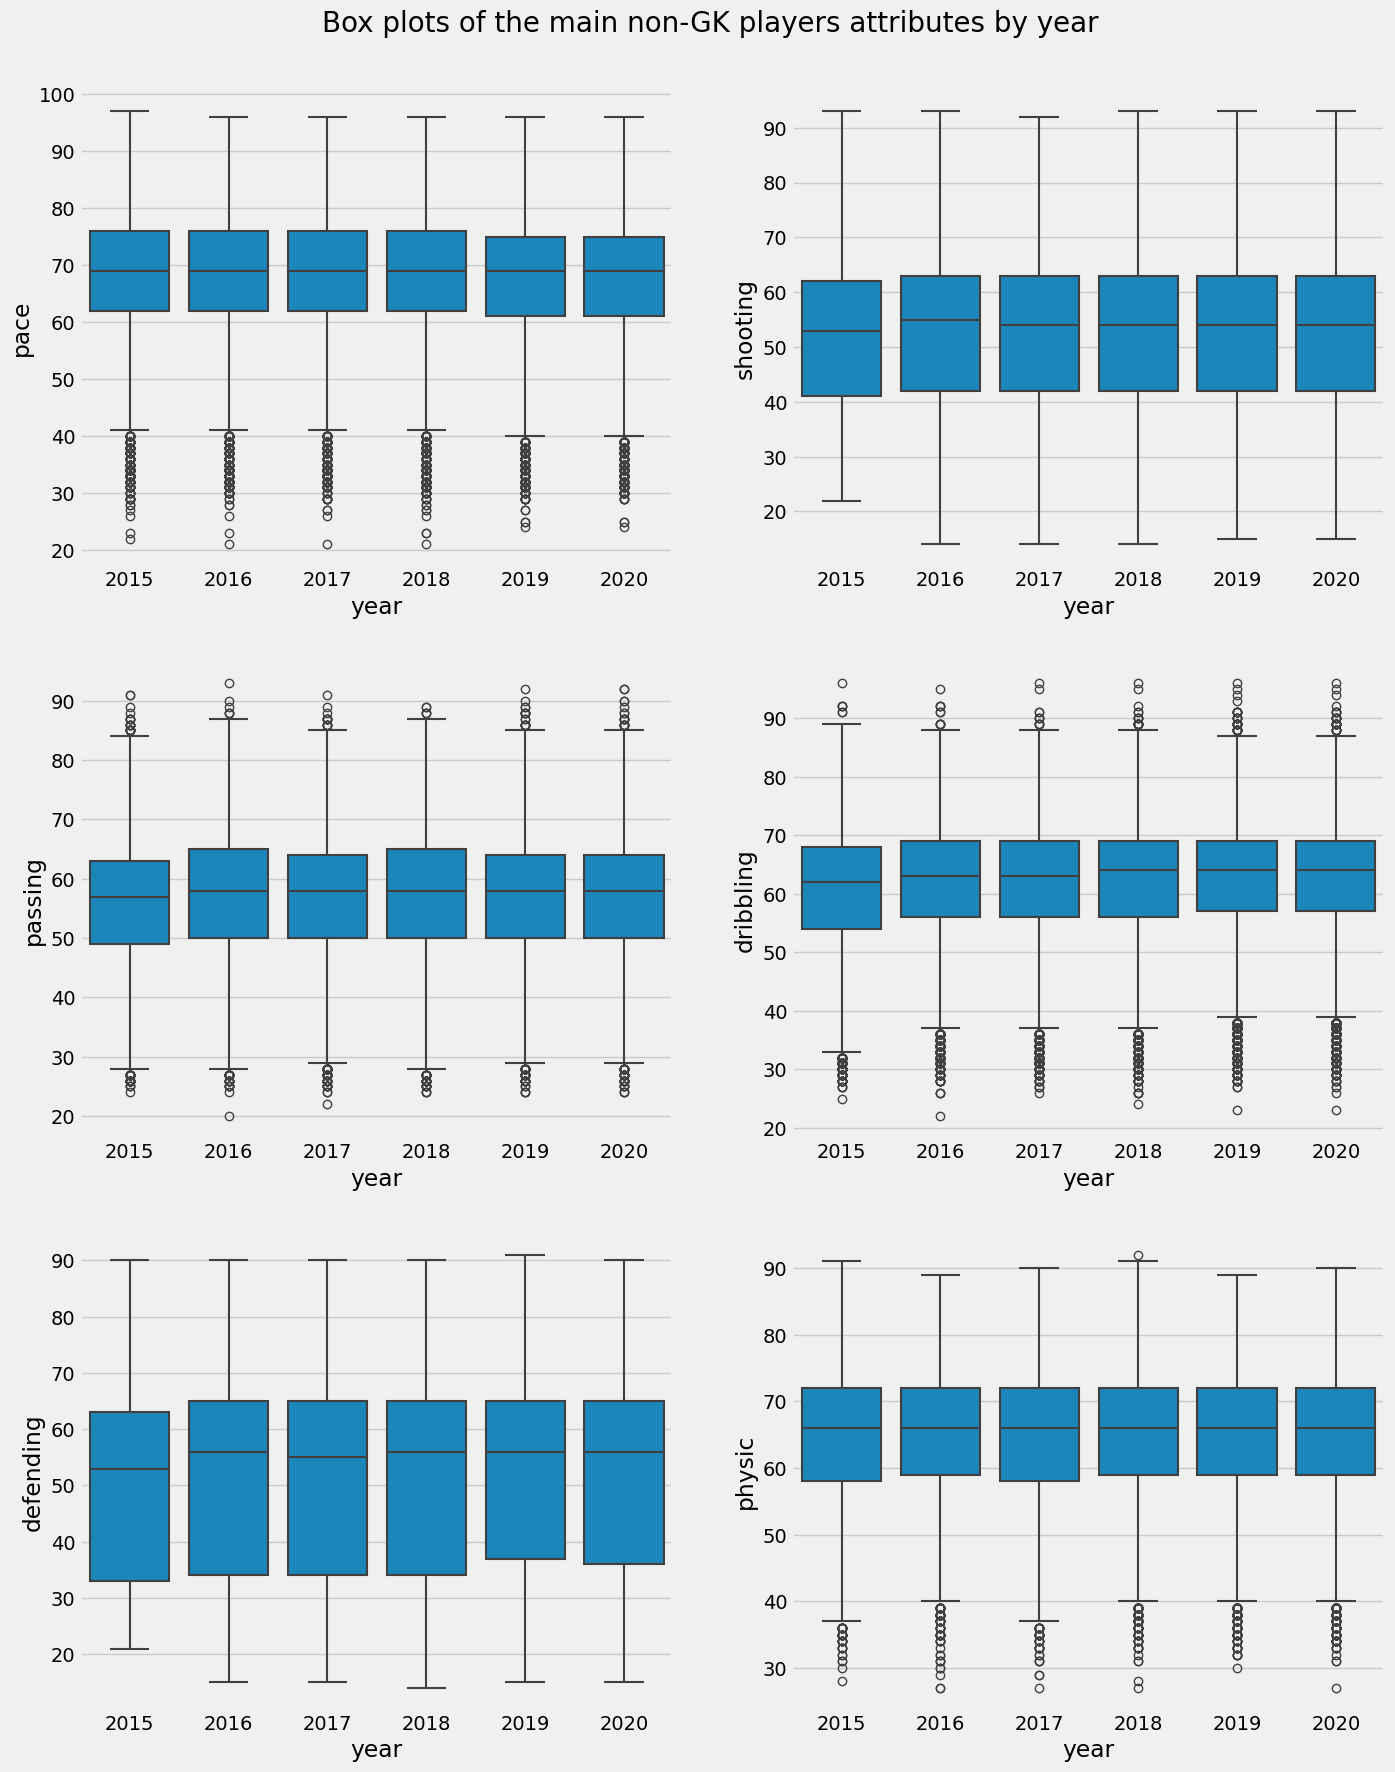

In [44]:
temp=get_players_noGK(df)
plt.figure(figsize=(15,20))
plt.suptitle('Box plots of the main non-GK players attributes by year', y=0.92, fontsize=20)
plt.subplot(321)
sb.boxplot(data=temp, x='year', y='pace',  linewidth=1.5)
plt.subplot(322)
sb.boxplot(data=temp, x='year', y='shooting',  linewidth=1.5)
plt.subplot(323)
sb.boxplot(data=temp, x='year', y='passing',  linewidth=1.5)
plt.subplot(324)
sb.boxplot(data=temp, x='year', y='dribbling',  linewidth=1.5)
plt.subplot(325)
sb.boxplot(data=temp, x='year', y='defending',  linewidth=1.5)
plt.subplot(326)
sb.boxplot(data=temp, x='year', y='physic',  linewidth=1.5);

In [45]:
def get_best_by_pos(df):
    l=[]
    temp = df.groupby(['team_position'])[['overall']].max()
    for i in list(temp.index):
        ovr = temp.loc[i][0]
        best_i = df.query('team_position==@i & overall==@ovr').iloc[0]
        l.append(best_i)
    best_pos = pd.DataFrame(l)
    return best_pos

In [46]:
l=[]
l.append(get_best_by_pos(df15))
l.append(get_best_by_pos(df16))
l.append(get_best_by_pos(df17))
l.append(get_best_by_pos(df18))
l.append(get_best_by_pos(df19))
l.append(get_best_by_pos(df20))
best_pos = pd.concat(l, ignore_index=True)

<ipython-input-45-7f1a4b867715>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ovr = temp.loc[i][0]
<ipython-input-45-7f1a4b867715>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ovr = temp.loc[i][0]
<ipython-input-45-7f1a4b867715>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ovr = temp.loc[i][0]
<ipython-input-45-7f1a4b867715>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version

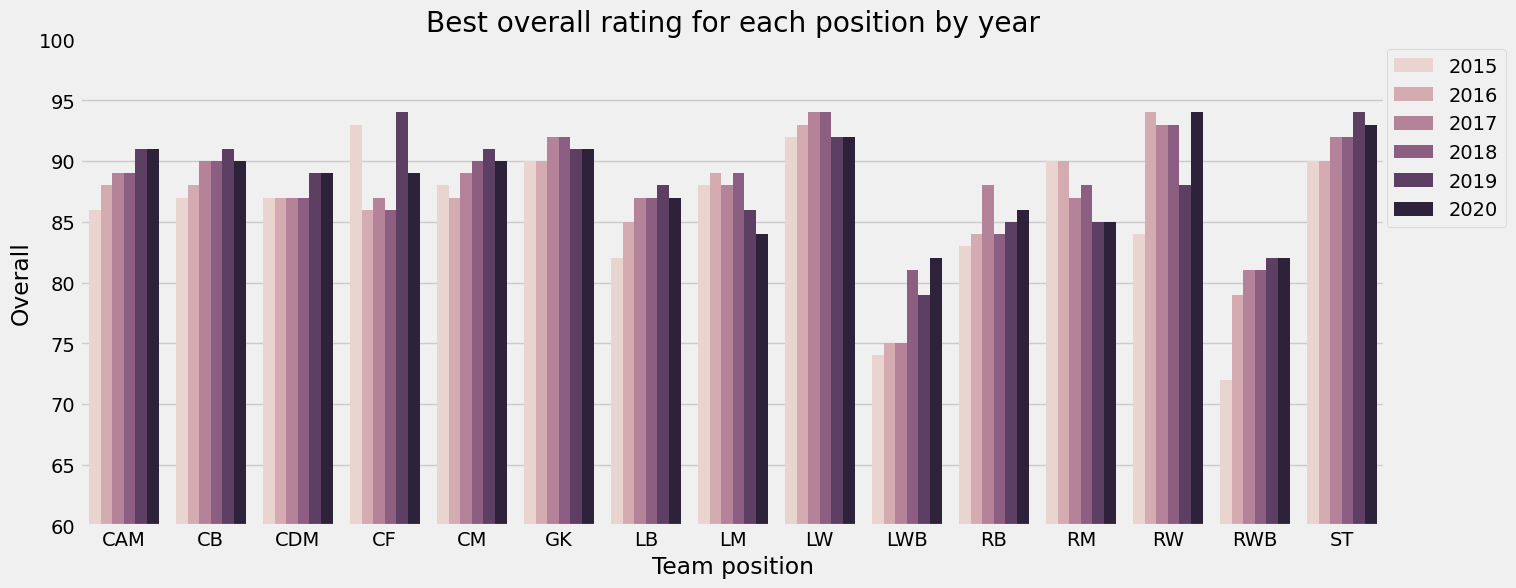

In [47]:
plt.figure(figsize=(15,6))
plt.title('Best overall rating for each position by year')
sb.barplot(data=best_pos, x='team_position', y='overall', hue='year')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.xlabel('Team position')
plt.ylabel('Overall')
plt.ylim(60,100);

In [48]:
gb = best_pos.groupby('team_position')
l = [gb.get_group(x) for x in gb.groups]

display(l[0].loc[:,['short_name','team_position','overall','club','nationality','year']])
display(l[1].loc[:,['short_name','team_position','overall','club','nationality','year']])
CSS = """
div.cell:nth-child(60) .output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

,short_name,team_position,overall,club,nationality,year
0,J. Rodríguez,CAM,86,Real Madrid,Colombia,2015
15,David Silva,CAM,88,Manchester City,Spain,2016
30,M. Özil,CAM,89,Arsenal,Germany,2017
45,K. De Bruyne,CAM,89,Manchester City,Belgium,2018
60,K. De Bruyne,CAM,91,Manchester City,Belgium,2019
75,K. De Bruyne,CAM,91,Manchester City,Belgium,2020


,short_name,team_position,overall,club,nationality,year
1,Sergio Ramos,CB,87,Real Madrid,Spain,2015
16,Thiago Silva,CB,88,Paris Saint-Germain,Brazil,2016
31,J. Boateng,CB,90,FC Bayern München,Germany,2017
46,Sergio Ramos,CB,90,Real Madrid,Spain,2018
61,Sergio Ramos,CB,91,Real Madrid,Spain,2019
76,V. van Dijk,CB,90,Liverpool,Netherlands,2020


In [49]:
display(l[2].loc[:,['short_name','team_position','overall','club','nationality','year']])
display(l[3].loc[:,['short_name','team_position','overall','club','nationality','year']])
CSS = """
div.cell:nth-child(61) .output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

,short_name,team_position,overall,club,nationality,year
2,P. Lahm,CDM,87,FC Bayern München,Germany,2015
17,P. Lahm,CDM,87,FC Bayern München,Germany,2016
32,Sergio Busquets,CDM,87,FC Barcelona,Spain,2017
47,N. Kanté,CDM,87,Chelsea,France,2018
62,N. Kanté,CDM,89,Chelsea,France,2019
77,N. Kanté,CDM,89,Chelsea,France,2020


,short_name,team_position,overall,club,nationality,year
3,L. Messi,CF,93,FC Barcelona,Argentina,2015
18,T. Müller,CF,86,FC Bayern München,Germany,2016
33,T. Müller,CF,87,FC Bayern München,Germany,2017
48,D. Mertens,CF,86,Napoli,Belgium,2018
63,L. Messi,CF,94,FC Barcelona,Argentina,2019
78,A. Griezmann,CF,89,FC Barcelona,France,2020


In [56]:
interesting_cols = ["short_name",'height_cm','weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur',
       'wage_eur', 'preferred_foot','skill_moves', 'work_rate', 'body_type','pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attack_oa', 'skill_oa', 'movements_oa',
       'power_oa', 'mentality_oa', 'defending_oa', 'gk_oa', 'trait_coef']
select_df = df[interesting_cols]

In [57]:
select_df.head(5)

,short_name,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,...,defending,physic,attack_oa,skill_oa,movements_oa,power_oa,mentality_oa,defending_oa,gk_oa,trait_coef
0,L. Messi,169,67,Argentina,FC Barcelona,93,95,0,0,Left,...,27.0,63.0,83.0,90.0,94.0,75.0,54.0,22.0,11.0,16
1,Cristiano Ronaldo,185,80,Portugal,Real Madrid,92,92,0,0,Right,...,32.0,79.0,88.0,85.0,84.0,90.0,58.0,25.0,12.0,18
2,A. Robben,180,80,Netherlands,FC Bayern München,90,90,0,0,Left,...,32.0,64.0,79.0,86.0,93.0,78.0,59.0,28.0,10.0,20
3,Z. Ibrahimović,195,95,Sweden,Paris Saint-Germain,90,90,0,0,Right,...,34.0,86.0,84.0,84.0,73.0,85.0,60.0,28.0,12.0,20
4,M. Neuer,193,92,Germany,FC Bayern München,90,90,0,0,Right,...,0.0,0.0,28.0,29.0,62.0,57.0,25.0,25.0,90.0,8


In [58]:
select_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100995 entries, 0 to 100994
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   short_name      100995 non-null  object 
 1   height_cm       100995 non-null  int64  
 2   weight_kg       100995 non-null  int64  
 3   nationality     100995 non-null  object 
 4   club            100995 non-null  object 
 5   overall         100995 non-null  int64  
 6   potential       100995 non-null  int64  
 7   value_eur       100995 non-null  int64  
 8   wage_eur        100995 non-null  int64  
 9   preferred_foot  100995 non-null  object 
 10  skill_moves     100995 non-null  int64  
 11  work_rate       100995 non-null  object 
 12  body_type       100995 non-null  object 
 13  pace            100995 non-null  float64
 14  shooting        100995 non-null  float64
 15  passing         100995 non-null  float64
 16  dribbling       100995 non-null  float64
 17  defending 

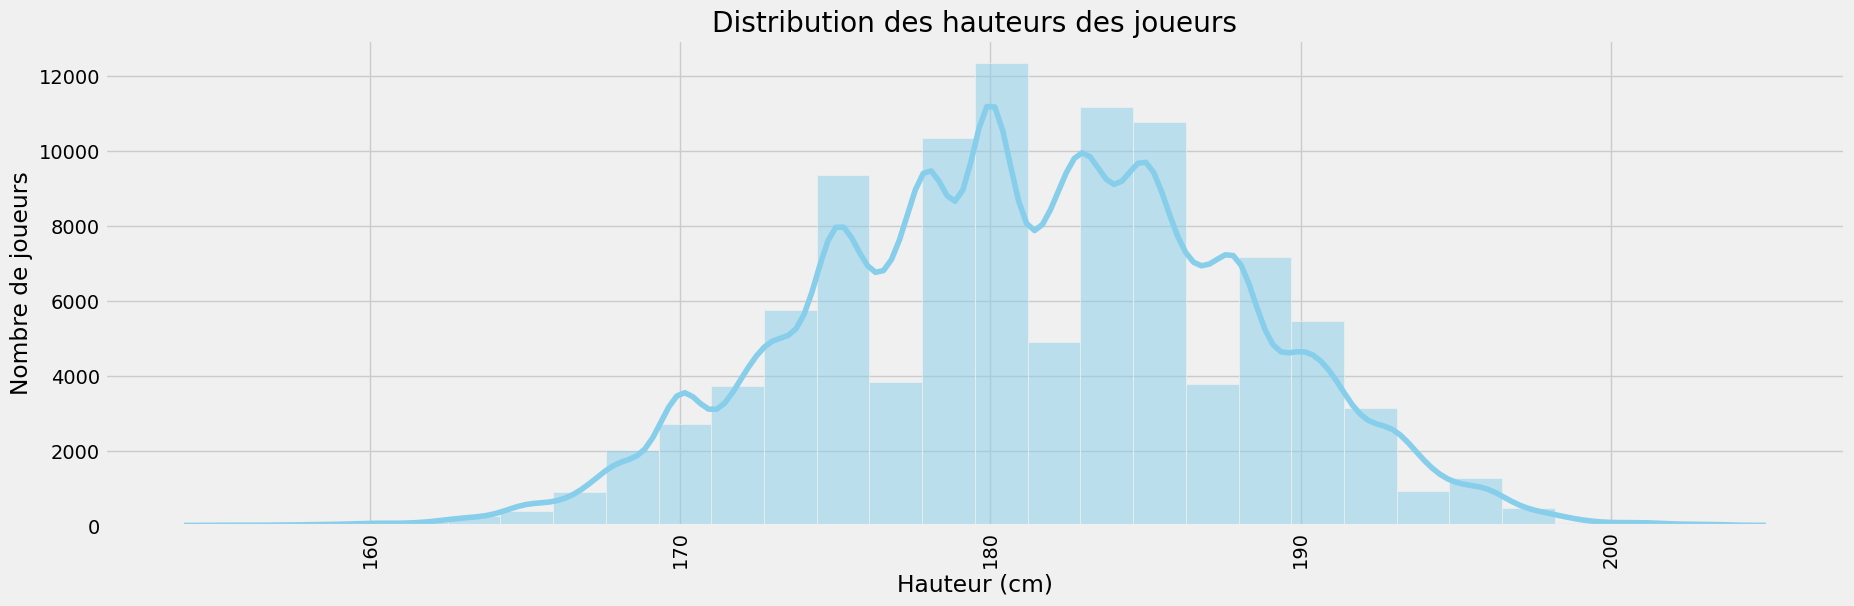

In [91]:
import seaborn as sns
plt.figure(figsize=(20, 6))
sns.histplot(select_df['height_cm'], bins=30, kde=True, color='skyblue')
plt.title('Distribution des hauteurs des joueurs')
plt.xlabel('Hauteur (cm)')
plt.ylabel('Nombre de joueurs')
plt.xticks(rotation=90)
plt.show()

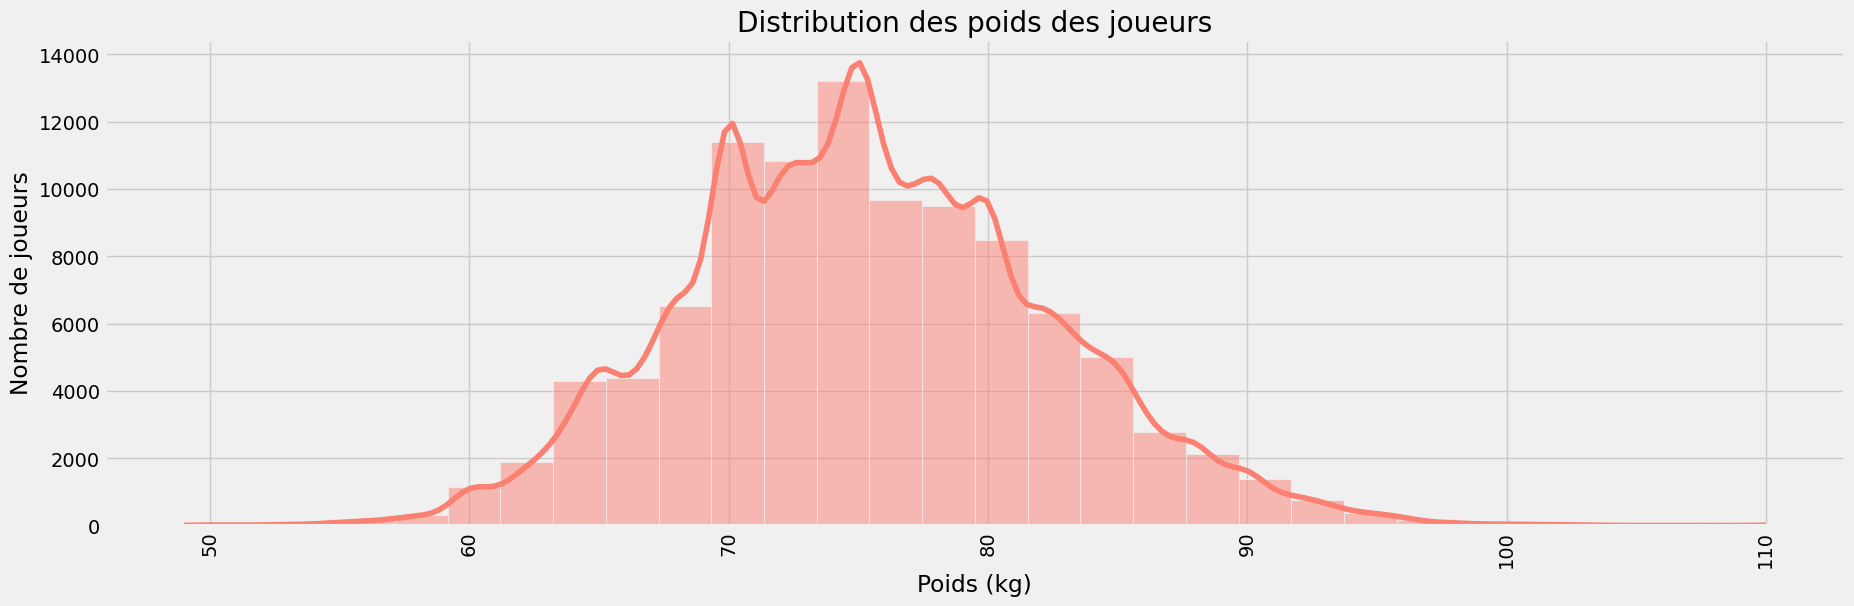

In [90]:
plt.figure(figsize=(20, 6))
sns.histplot(df['weight_kg'], bins=30, kde=True, color='salmon')
plt.title('Distribution des poids des joueurs')
plt.xlabel('Poids (kg)')
plt.ylabel('Nombre de joueurs')
plt.xticks(rotation=90)
plt.show()

<ipython-input-89-cb4dc33e0781>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_nationalities.index, y=top_nationalities.values, palette='viridis')


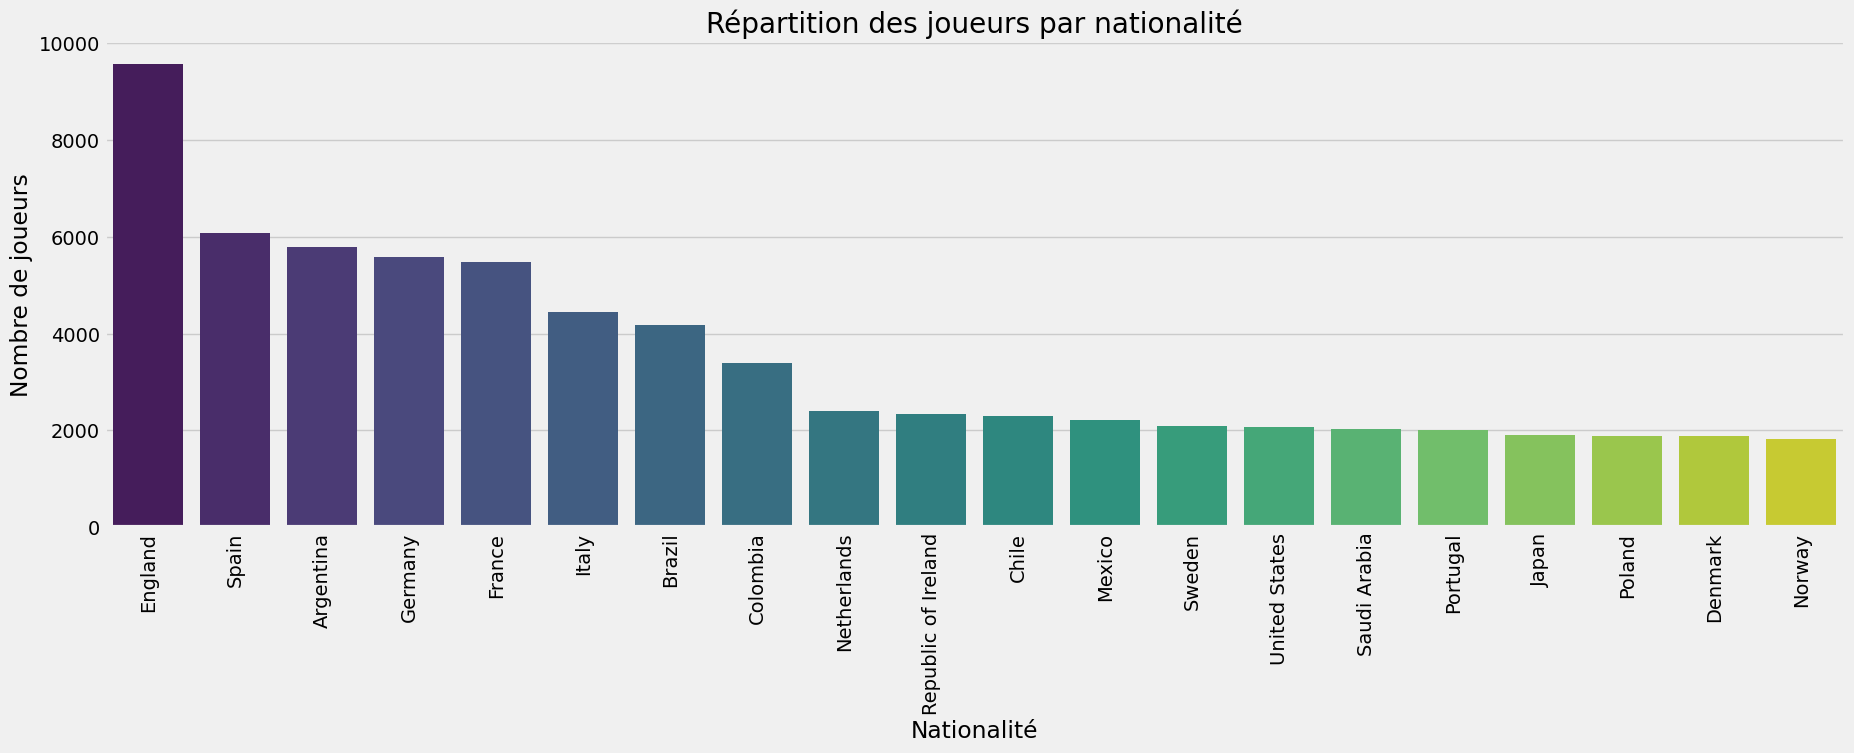

In [89]:
plt.figure(figsize=(20, 6))
top_nationalities = df['nationality'].value_counts().head(20)
sns.barplot(x=top_nationalities.index, y=top_nationalities.values, palette='viridis')
plt.title('Répartition des joueurs par nationalité')
plt.xlabel('Nationalité')
plt.ylabel('Nombre de joueurs')
plt.xticks(rotation=90)
plt.show()

<ipython-input-65-e45d065476ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_clubs.index, y=top_clubs.values, palette='magma')


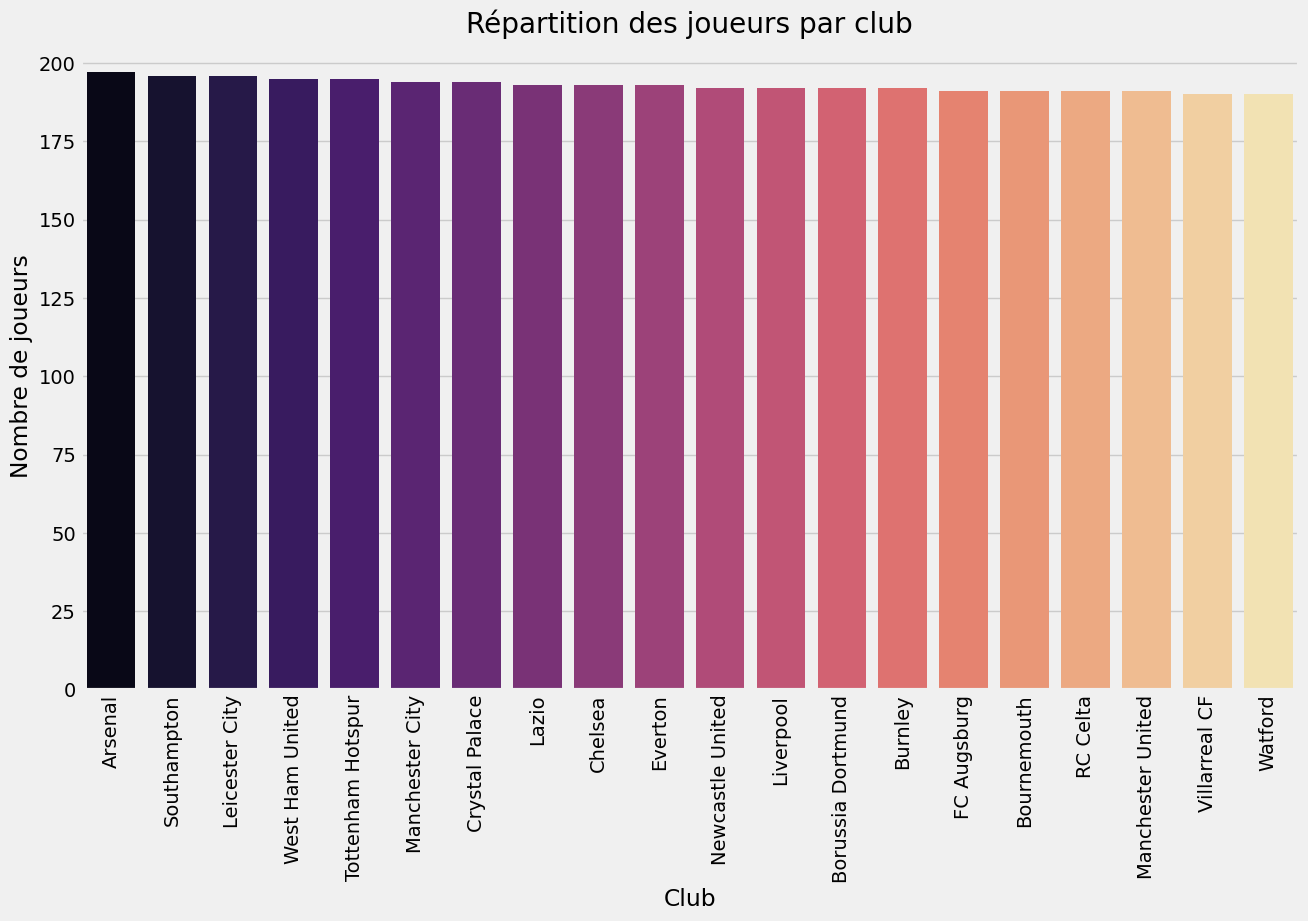

In [65]:
plt.figure(figsize=(14, 8))
top_clubs = df['club'].value_counts().head(20)
sns.barplot(x=top_clubs.index, y=top_clubs.values, palette='magma')
plt.title('Répartition des joueurs par club')
plt.xlabel('Club')
plt.ylabel('Nombre de joueurs')
plt.xticks(rotation=90)
plt.show()

<ipython-input-88-099349551e4c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='preferred_foot', data=df, palette='coolwarm')


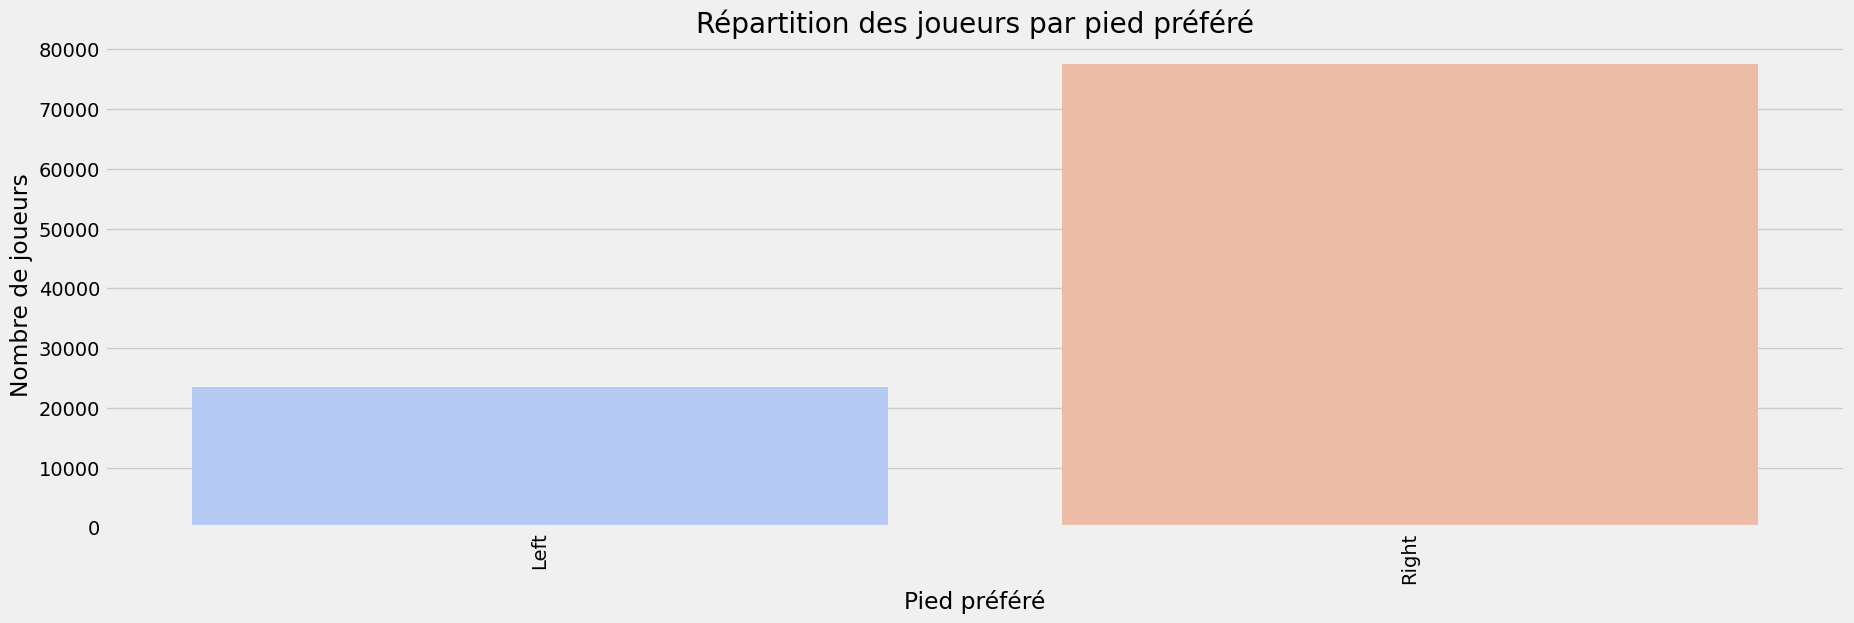

In [88]:
plt.figure(figsize=(20, 6))
sns.countplot(x='preferred_foot', data=df, palette='coolwarm')
plt.title('Répartition des joueurs par pied préféré')
plt.xlabel('Pied préféré')
plt.ylabel('Nombre de joueurs')
plt.xticks(rotation=90)
plt.show()

<ipython-input-87-32b188476f04>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='body_type', data=df, palette='cubehelix')


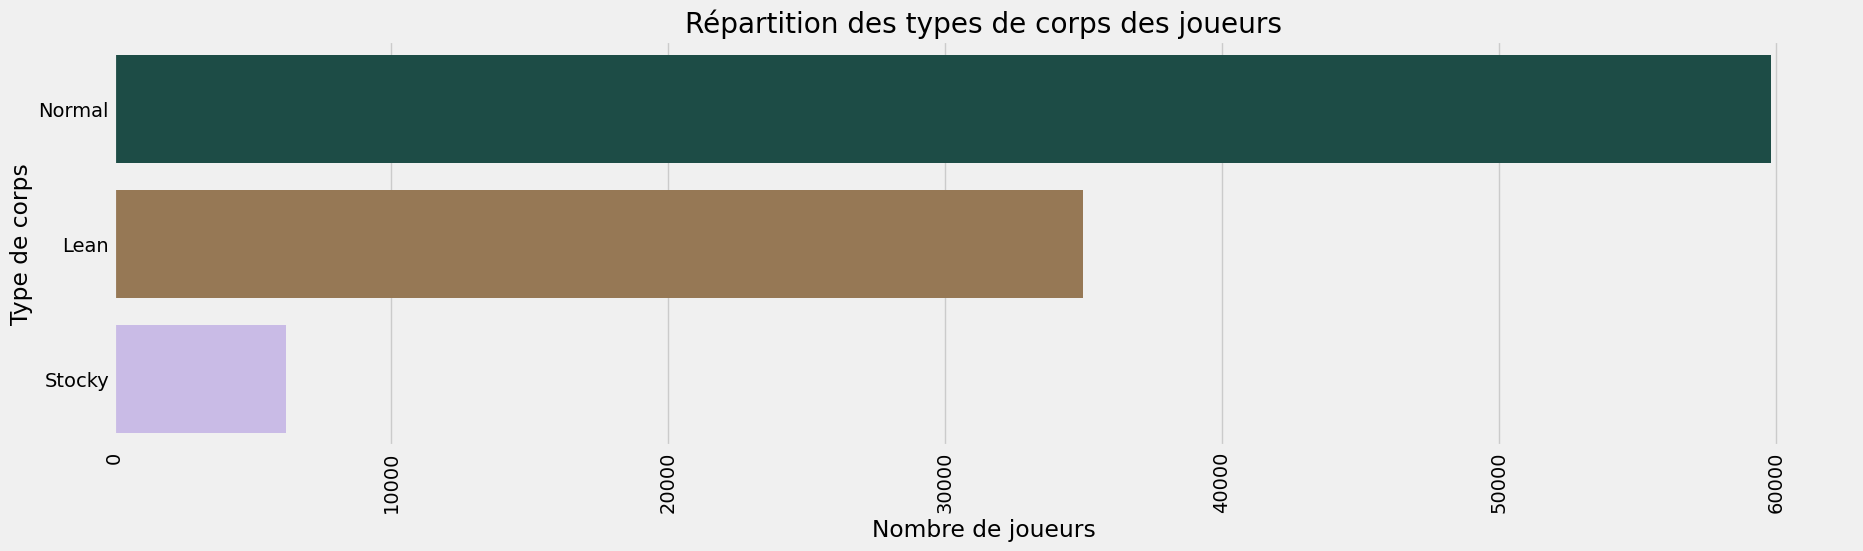

In [87]:
plt.figure(figsize=(20, 5))
sns.countplot(y='body_type', data=df, palette='cubehelix')
plt.title('Répartition des types de corps des joueurs')
plt.xlabel('Nombre de joueurs')
plt.ylabel('Type de corps')
plt.xticks(rotation=90)
plt.show()

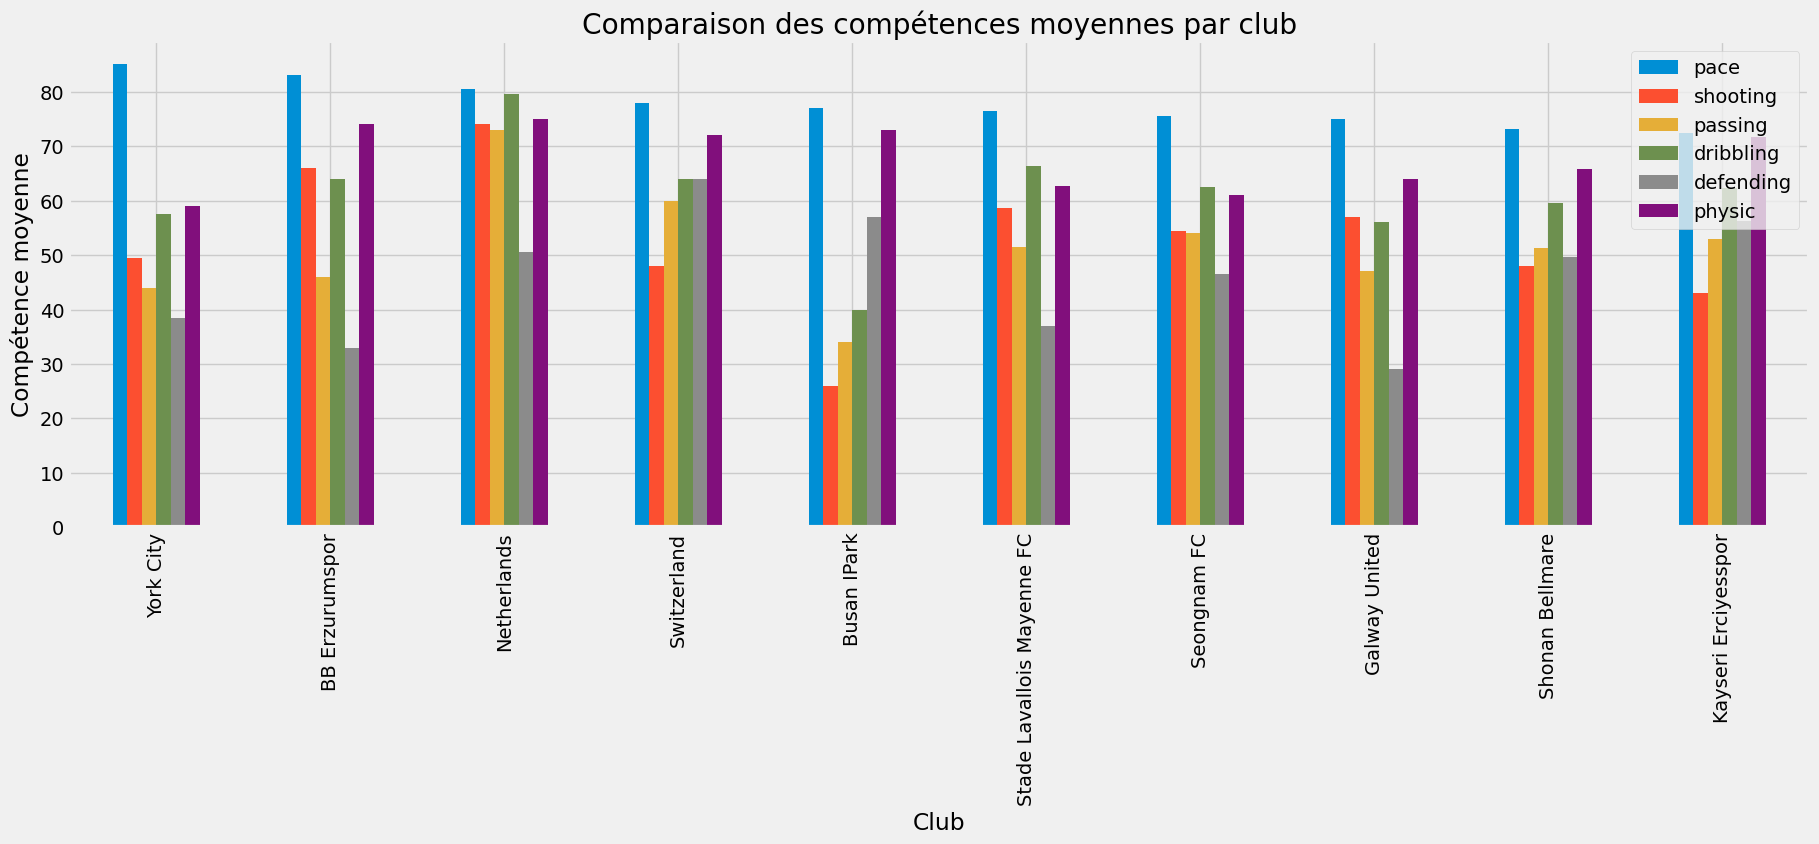

In [86]:
club_stats = df.groupby('club')[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].mean().sort_values(by='pace', ascending=False).head(10)
club_stats.plot(kind='bar', figsize=(20, 6))
plt.title('Comparaison des compétences moyennes par club')
plt.xlabel('Club')
plt.ylabel('Compétence moyenne')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

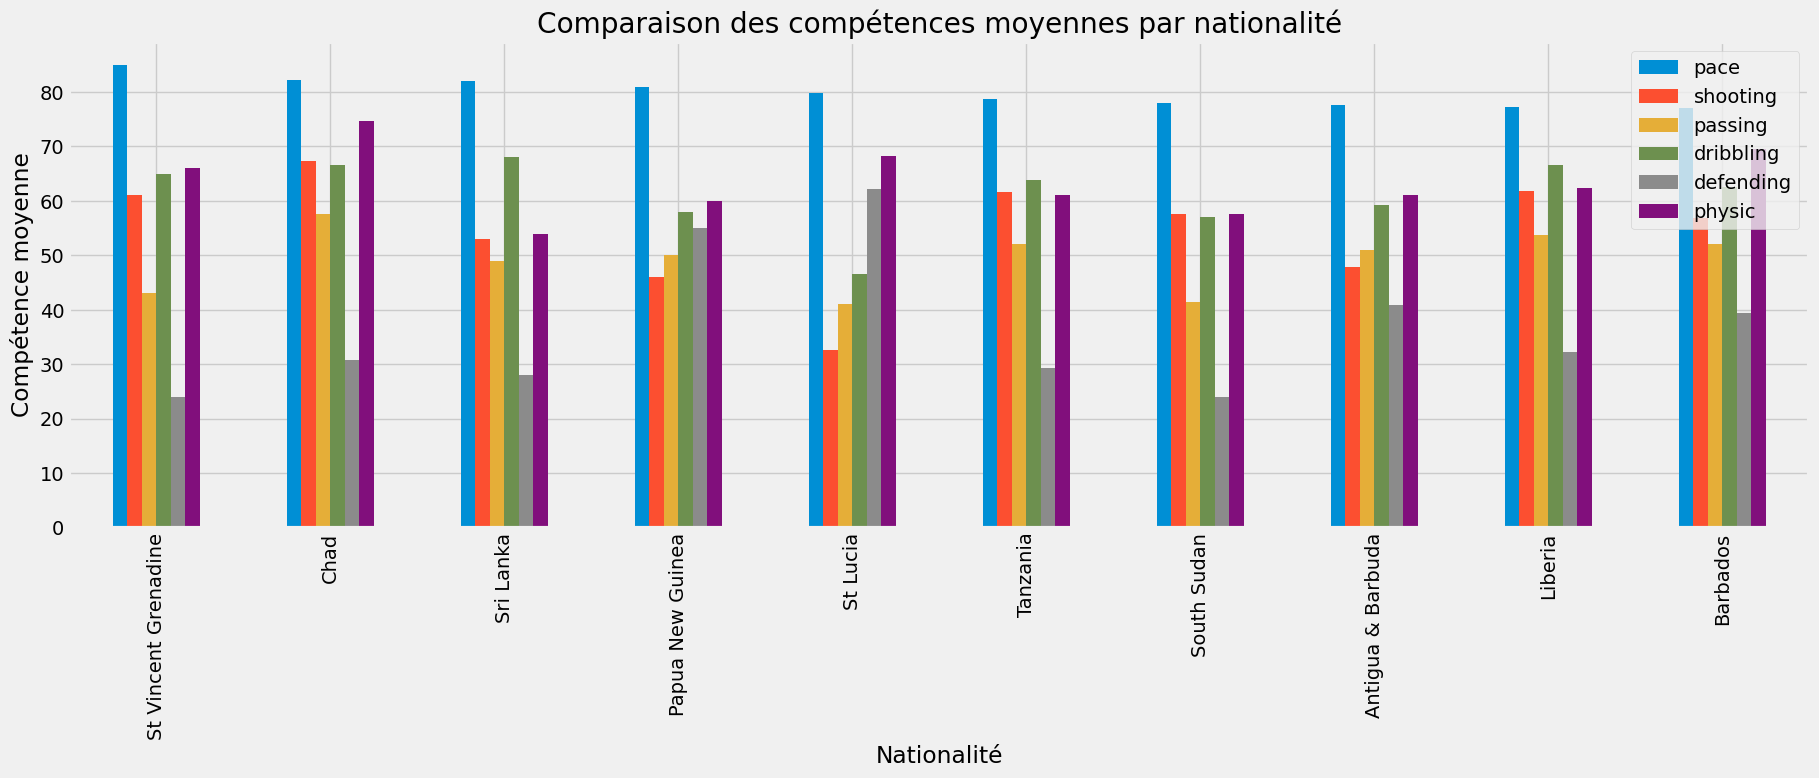

In [85]:
nationality_stats = df.groupby('nationality')[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].mean().sort_values(by='pace', ascending=False).head(10)
nationality_stats.plot(kind='bar', figsize=(20, 6))
plt.title('Comparaison des compétences moyennes par nationalité')
plt.xlabel('Nationalité')
plt.ylabel('Compétence moyenne')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

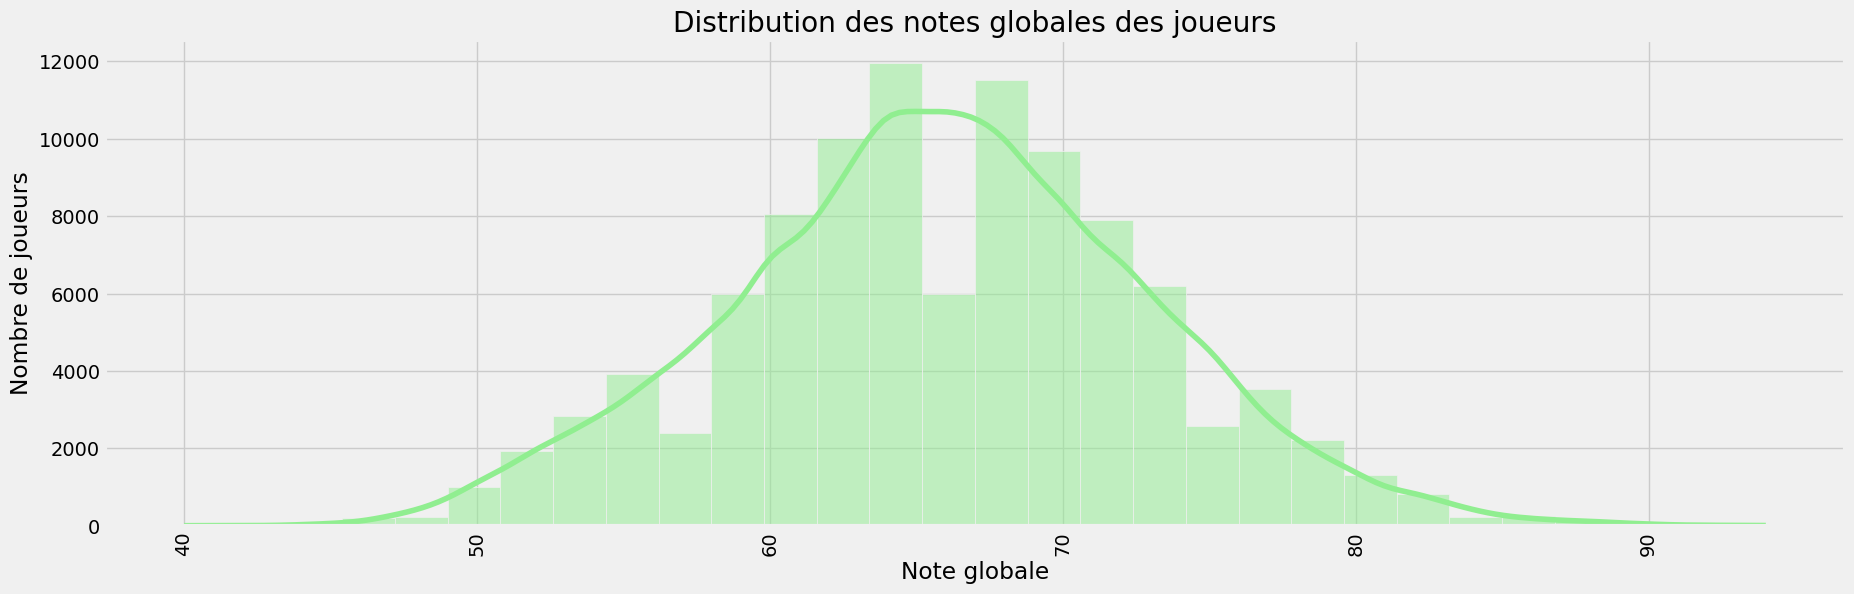

In [84]:
plt.figure(figsize=(20, 6))
sns.histplot(df['overall'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution des notes globales des joueurs')
plt.xlabel('Note globale')
plt.ylabel('Nombre de joueurs')
plt.xticks(rotation=90)
plt.show()

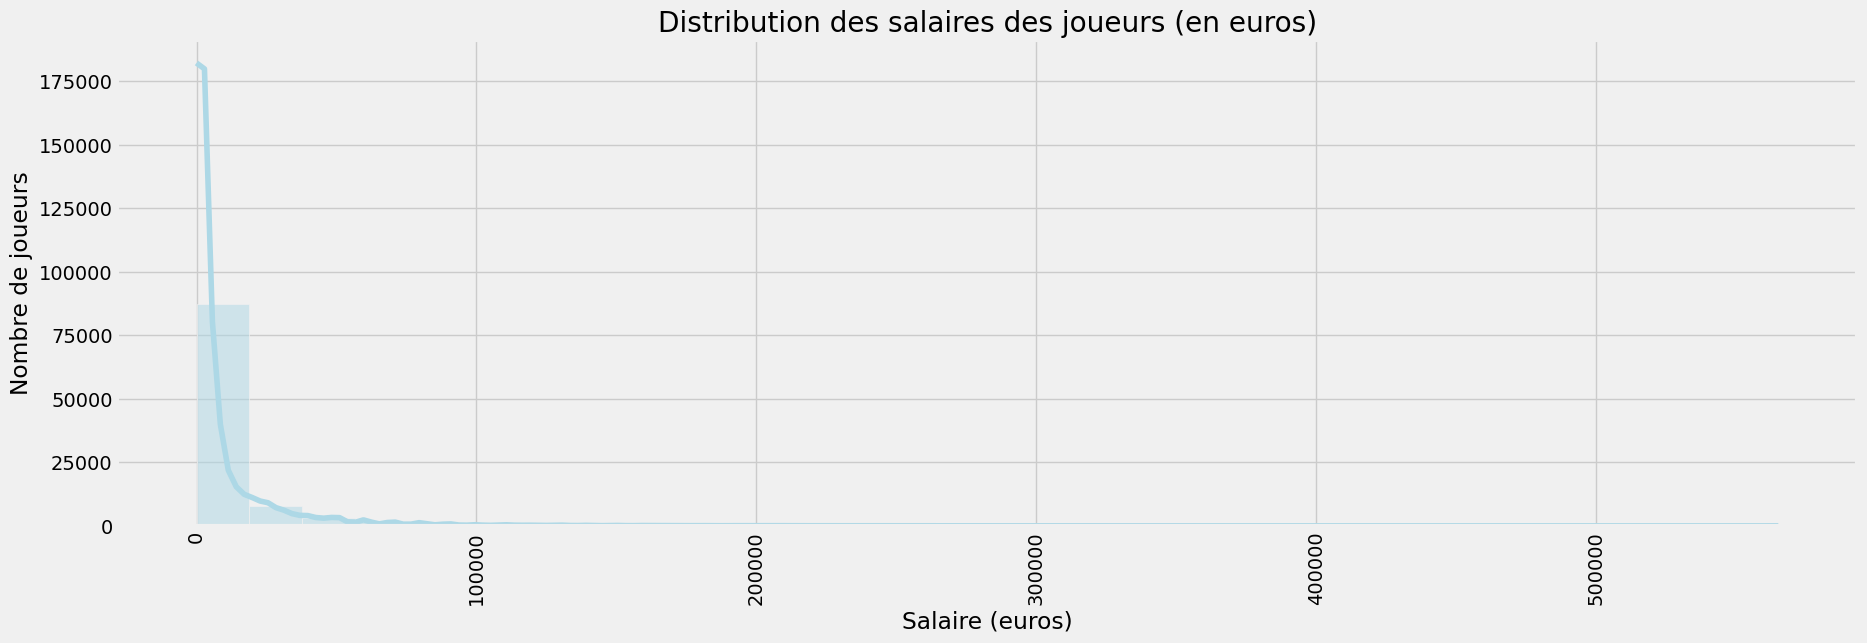

In [83]:
plt.figure(figsize=(20, 6))
sns.histplot(df['wage_eur'], bins=30, kde=True, color='lightblue')
plt.title('Distribution des salaires des joueurs (en euros)')
plt.xlabel('Salaire (euros)')
plt.ylabel('Nombre de joueurs')
plt.xticks(rotation=90)
plt.show()

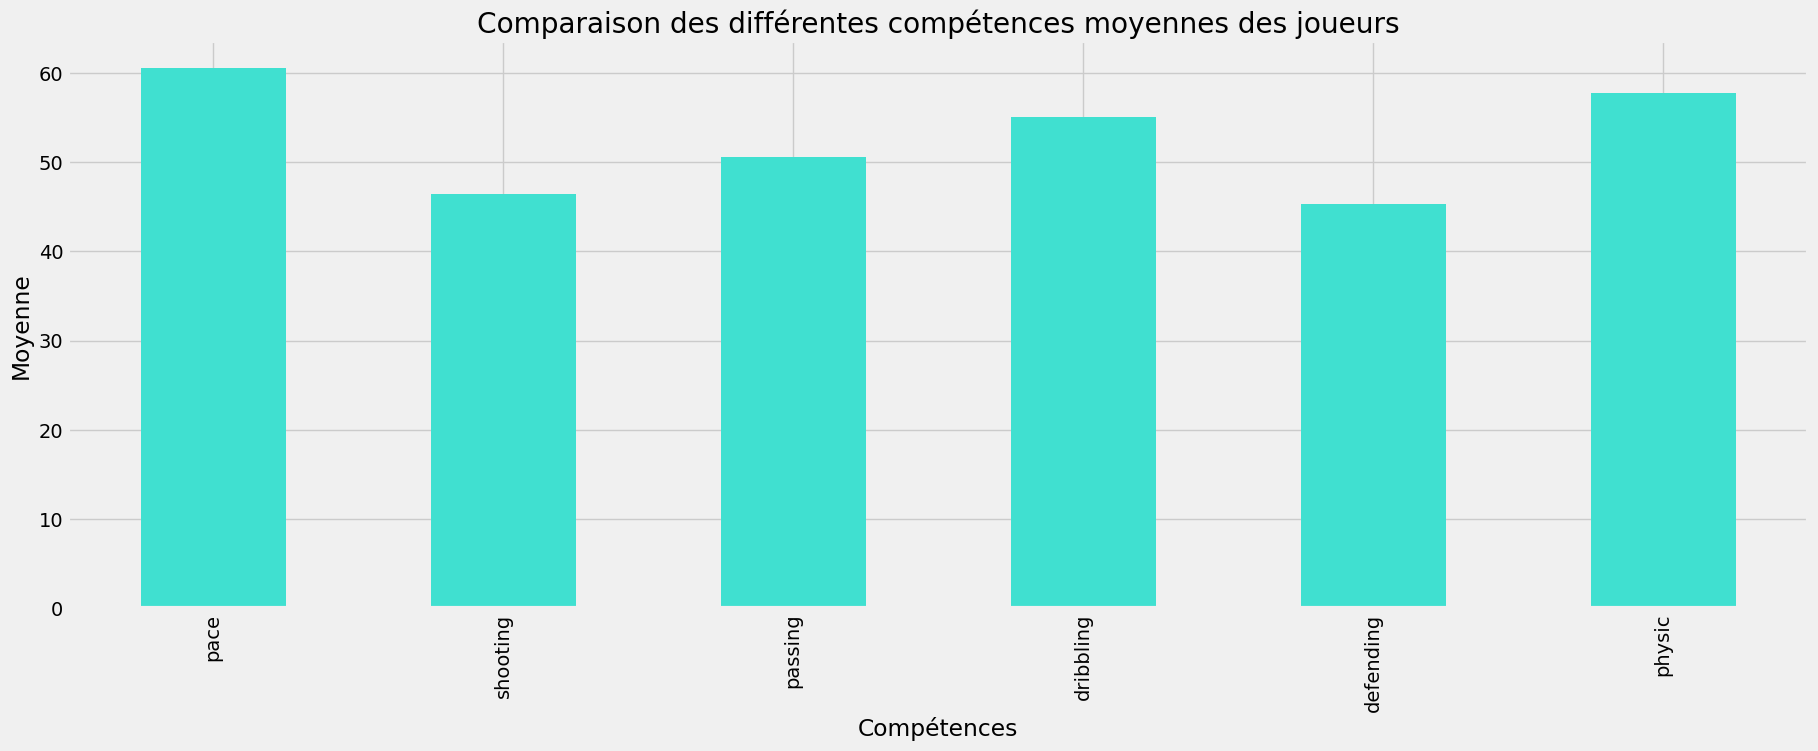

In [82]:
# 14. Comparaison des différentes compétences
skills = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
select_df[skills].mean().plot(kind='bar', figsize=(20, 7), color='turquoise')
plt.title('Comparaison des différentes compétences moyennes des joueurs')
plt.xlabel('Compétences')
plt.ylabel('Moyenne')
plt.xticks(rotation=90)
plt.show()